In [1]:
import os

os.environ['NEO4J_BOLT_URL']='bolt://localhost:7687'
os.environ['NEO_PASS']='rl123456'
os.environ['NEO_USER']='neo4j'


In [2]:
import omniplot

ModuleNotFoundError: No module named 'omniplot'

In [2]:
import torch
from data_helpers.data_preparation import StateLoader
from models.HeCo import HeCo
from heco_params import heco_params


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder


In [4]:
## EPISODE ENCODING

In [47]:
st_loader = StateLoader(nr_mps=2, mps=None)
(batch_pos1, batch_pos2, batch_neg1), all_state_keys, all_aff_keys, all_obj_keys, action_keys, (fstate_p1, fstate_p2, fstate_n1) = st_loader.get_subgraph_episode_data(batch_size=1)
feats = batch_pos1[0][0]
nei_index = batch_pos1[0][1]
mps = st_loader.generate_mps_episode(nei_index,  fstate_p1)
mps_dims = [mp.shape[1] for mp in mps]
feats_dim_list = [i.shape[1] for i in batch_pos1[0][0]]

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21977.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21977.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21977.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21977.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22136.pickle
C:\Users\WorkSta

In [4]:
dirs= ['checkpoints_01_cum20', 'checkpoints_02_cum20', 'checkpoints_1_cum20', 'checkpoints_12_cum20', 'checkpoints_15_cum20','checkpoints_hybrid']

checkpoints = []
for check_dir in dirs:
    PATH_TO_CHECKPOINTS = os.path.join(str(os.getcwd()),check_dir)
    files = os.listdir(PATH_TO_CHECKPOINTS)

    if check_dir == 'checkpoints_hybrid':
        file = files[len(files)-1]
        print(file)
    else:
        print(files[21])
        file = files[21]
    
    checkpoint_path = os.path.join(PATH_TO_CHECKPOINTS, file)
    checkpoints.append(checkpoint_path)
    
print(checkpoints)


ep_triplet_0.1_29_0.0.pkl
ep_triplet_0.2_29_0.0.pkl
ep_triplet_1.0_27_0.0.pkl
ep_triplet_1.2_29_0.0.pkl
ep_triplet_1.5_25_0.0.pkl
ep_hybrid_1.5_9_0.26045992970466614.pkl
['C:\\Users\\WorkStation\\Documents\\rl_main_loop_create_env\\hetgraph_gt_encoder\\checkpoints_01_cum20\\ep_triplet_0.1_29_0.0.pkl', 'C:\\Users\\WorkStation\\Documents\\rl_main_loop_create_env\\hetgraph_gt_encoder\\checkpoints_02_cum20\\ep_triplet_0.2_29_0.0.pkl', 'C:\\Users\\WorkStation\\Documents\\rl_main_loop_create_env\\hetgraph_gt_encoder\\checkpoints_1_cum20\\ep_triplet_1.0_27_0.0.pkl', 'C:\\Users\\WorkStation\\Documents\\rl_main_loop_create_env\\hetgraph_gt_encoder\\checkpoints_12_cum20\\ep_triplet_1.2_29_0.0.pkl', 'C:\\Users\\WorkStation\\Documents\\rl_main_loop_create_env\\hetgraph_gt_encoder\\checkpoints_15_cum20\\ep_triplet_1.5_25_0.0.pkl', 'C:\\Users\\WorkStation\\Documents\\rl_main_loop_create_env\\hetgraph_gt_encoder\\checkpoints_hybrid\\ep_hybrid_1.5_9_0.26045992970466614.pkl']


In [5]:
dirs= ['checkpoints_01_cum20', 'checkpoints_02_cum20', 'checkpoints_1_cum20', 'checkpoints_12_cum20', 'checkpoints_15_cum20','checkpoints_hybrid']

bad_checkpoints = []
for check_dir in dirs:
    PATH_TO_CHECKPOINTS = os.path.join(str(os.getcwd()),check_dir)
    files = os.listdir(PATH_TO_CHECKPOINTS)

    file = files[0]
    print(file)
    
    checkpoint_path = os.path.join(PATH_TO_CHECKPOINTS, file)
    bad_checkpoints.append(checkpoint_path)
    
print(bad_checkpoints)


ep_triplet_0.1_0_0.0.pkl
ep_triplet_0.2_0_0.0.pkl
ep_triplet_1.0_0_0.0.pkl
ep_triplet_1.2_0_0.0.pkl
ep_triplet_1.5_0_0.0.pkl
ep_hybrid_1.5_0_0.5593168139457703.pkl
['C:\\Users\\WorkStation\\Documents\\rl_main_loop_create_env\\hetgraph_gt_encoder\\checkpoints_01_cum20\\ep_triplet_0.1_0_0.0.pkl', 'C:\\Users\\WorkStation\\Documents\\rl_main_loop_create_env\\hetgraph_gt_encoder\\checkpoints_02_cum20\\ep_triplet_0.2_0_0.0.pkl', 'C:\\Users\\WorkStation\\Documents\\rl_main_loop_create_env\\hetgraph_gt_encoder\\checkpoints_1_cum20\\ep_triplet_1.0_0_0.0.pkl', 'C:\\Users\\WorkStation\\Documents\\rl_main_loop_create_env\\hetgraph_gt_encoder\\checkpoints_12_cum20\\ep_triplet_1.2_0_0.0.pkl', 'C:\\Users\\WorkStation\\Documents\\rl_main_loop_create_env\\hetgraph_gt_encoder\\checkpoints_15_cum20\\ep_triplet_1.5_0_0.0.pkl', 'C:\\Users\\WorkStation\\Documents\\rl_main_loop_create_env\\hetgraph_gt_encoder\\checkpoints_hybrid\\ep_hybrid_1.5_0_0.5593168139457703.pkl']


In [6]:
count_mps=2

args = heco_params()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
def get_data_for_episode(st_loader, batch, full_state):
    feats = batch[0][0]
    nei_index = batch[0][1]
    mps = st_loader.generate_mps_episode(nei_index, full_state)
    return feats, nei_index, mps

In [8]:
alpha=0.1
loss_type=None

tasks = ["CreateLevelPush-v0",
                       "CreateLevelBuckets-v0",
                       "CreateLevelBasket-v0","CreateLevelBelt-v0",
                       "CreateLevelObstacle-v0"]

succ_fail = ['true', 'false']

batch_pos1, all_state_keys, all_aff_keys, all_obj_keys, action_keys, fstate_p1, anchor_file = st_loader.get_subgraph_episode_data_by_task(task_1=tasks[0], succ_fail=succ_fail[0])
feats_p1, nei_index_p1, mps_p1 = get_data_for_episode(st_loader, batch_pos1, fstate_p1)
print(mps_p1)

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle
[tensor(indices=tensor([[ 0,  0,  0,  0,  0,  0,  0,  0],
                       [74, 75, 76, 77, 78, 79, 80, 81]]),
       values=tensor([1., 1., 1., 1., 1., 1., 1., 1.]),
       size=(1, 2979), nnz=8, layout=torch.sparse_coo), tensor(indices=tensor([[  0,   0,   

In [9]:
def get_encoding_task(model, task, succ):
    push_succ_1, all_state_keys, all_aff_keys, all_obj_keys, action_keys, fstate_push_succ_p1, anchor_file_push_succ_1 = st_loader.get_subgraph_episode_data_by_task(task_1=task, succ_fail=succ)
    feats_push_succ_1, nei_index_push_succ_1, mps_push_succ_1 = get_data_for_episode(st_loader, push_succ_1, fstate_push_succ_p1)
    z_sc_push_succ_1, z_mp_push_succ_1, intra_push_succ_1, inter_push_succ_1 = model(feats_push_succ_1, mps_push_succ_1,nei_index_push_succ_1, alpha, loss_type, testing=True)
    return z_sc_push_succ_1, anchor_file_push_succ_1

    

In [10]:
import torch.nn.functional as F

def calculate_similarity_encoding(z_1, z_2):
    cosine_similarity_same_task = F.cosine_similarity(z_1,z_2, dim=1)
    cosine_distance_same_task = 1 - cosine_similarity_same_task
    return cosine_distance_same_task
    

In [11]:
push_succ_1, all_state_keys, all_aff_keys, all_obj_keys, action_keys, fstate_push_succ_p1, anchor_file_push_succ_1 = st_loader.get_subgraph_episode_data_by_task(task_1=tasks[0], succ_fail=succ_fail[0])
feats_push_succ_1, nei_index_push_succ_1, mps_push_succ_1 = get_data_for_episode(st_loader, push_succ_1, fstate_push_succ_p1)
z_sc_push_succ_1, z_mp_push_succ_1, intra_push_succ_1, inter_push_succ_1 = model(feats_push_succ_1, mps_push_succ_1,nei_index_push_succ_1, alpha, loss_type, testing=True)

push_succ_2, all_state_keys, all_aff_keys, all_obj_keys, action_keys, fstate_push_succ_p2, anchor_file_push_succ_2 = st_loader.get_subgraph_episode_data_by_task(task_1=tasks[0], succ_fail=succ_fail[0])
feats_push_succ_2, nei_index_push_succ_2, mps_push_succ_2 = get_data_for_episode(st_loader, push_succ_2, fstate_push_succ_p2)
z_sc_push_succ_2, z_mp_push_succ_2, intra_push_succ_2, inter_push_succ_2= model(feats_push_succ_2, mps_push_succ_2,nei_index_push_succ_2, alpha, loss_type, testing=True)

buckets_succ_1, all_state_keys, all_aff_keys, all_obj_keys, action_keys, fstate_buckets_succ_p1, anchor_file_buckets_succ_1 = st_loader.get_subgraph_episode_data_by_task(task_1=tasks[1], succ_fail=succ_fail[0])
feats_buckets_succ_1, nei_index_buckets_succ_1, mps_buckets_succ_1 = get_data_for_episode(st_loader, buckets_succ_1, fstate_buckets_succ_p1)
z_sc_uckets_succ_1, z_mp_buckets_succ_1, intra_buckets_succ_1, inter_buckets_succ_1 = model(feats_buckets_succ_1, mps_buckets_succ_1,nei_index_buckets_succ_1, alpha, loss_type, testing=True)

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true


NameError: name 'model' is not defined

In [15]:
z_sc_push_succ_1, file_push_succ_1 = get_encoding_task(model, tasks[0], succ_fail[0])
z_sc_push_succ_2, file_push_succ_2 = get_encoding_task(model, tasks[0], succ_fail[0])
z_sc_buckets_succ_1, file_buckets_succ_1 = get_encoding_task(model, tasks[1], succ_fail[0])


NameError: name 'model' is not defined

In [29]:
sim_same = calculate_similarity_encoding(z_sc_push_succ_1, z_sc_push_succ_2)
print(f'Similarity same task {sim_same[0].item()}')
print(f'Episodes {file_push_succ_1} - {file_push_succ_2}')

sim_diff = calculate_similarity_encoding(z_sc_push_succ_1, z_sc_buckets_succ_1)
print(f'Similarity same task {sim_diff}')
print(f'Episodes {file_push_succ_1} - {file_buckets_succ_1}')

Similarity same task 0.001351475715637207
Episodes 4-f37eb877-b166-4051-b3af-068130e1e141-938.pickle - 4-f37eb877-b166-4051-b3af-068130e1e141-586.pickle
Similarity same task (tensor([1.0308], device='cuda:0', grad_fn=<RsubBackward1>), tensor([10.2087], device='cuda:0', grad_fn=<CopyBackwards>))
Episodes 4-f37eb877-b166-4051-b3af-068130e1e141-938.pickle - 4-f37eb877-b166-4051-b3af-068130e1e141-7067.pickle


In [11]:
import torch
import torch.nn.functional as F
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define number of episodes to fetch per task and outcome type
num_episodes_per_type = 5

# Store the encoded vectors and their labels
z_encodings = []
labels = []

# Function to calculate similarity between two encodings along the second dimension
def calculate_similarity_encoding(z_1, z_2):
    # Cosine similarity along the feature dimension (dim=1)
    cosine_similarity = F.cosine_similarity(z_1, z_2, dim=1)
    # Convert similarity to cosine distance
    cosine_distance = 1 - cosine_similarity
    # Euclidean distance along the feature dimension
    euclidean_distance = torch.norm(z_1 - z_2, dim=1)
    return cosine_distance, euclidean_distance



In [12]:
def compute_encodings(checkpoint):
    tasks = ["CreateLevelPush-v0",
                       "CreateLevelBuckets-v0",
                       "CreateLevelBasket-v0","CreateLevelBelt-v0",
                       "CreateLevelObstacle-v0"]
    succ_fail = ['true', 'false']
    model = HeCo(args.hidden_dim, feats_dim_list, args.feat_drop, args.attn_drop,
                 count_mps, args.sample_rate, args.nei_num, args.tau, args.lam, mps_dims).to(device)
    model.load_state_dict(torch.load(checkpoint))

    model.eval()
    z_encodings = []
    labels = []
    # Loop through tasks and outcomes to fetch episodes
    for task in tasks:
        for outcome in succ_fail:
            for _ in range(num_episodes_per_type):
                try:
                    z_sc, anchor_file = get_encoding_task(model, task, outcome)
                    z_encodings.append(z_sc)
                    labels.append((task, outcome))
                except:
                    print(task)
                    continue

    # Convert list of tensors to a tensor for efficient operations
    z_encodings = torch.stack(z_encodings)
    return z_encodings, labels

In [48]:
z_encodings_diff_checkpoints = []
z_encoding_labels = []
for checkpoint in checkpoints:
    print(checkpoint)
    z_enc, labels = compute_encodings(checkpoint)
    z_encoding_labels.append(labels)
    z_encodings_diff_checkpoints.append(z_enc)

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\checkpoints_01_cum20\ep_triplet_0.1_29_0.0.pkl
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-371.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-371.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-371.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-371.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-229.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-229.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-229.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-229.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-371.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-371.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-371.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-371.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-444.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-444.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-444.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-444.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1353.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1353.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1353.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1353.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4095.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4095.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4095.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4095.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2087.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2087.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2087.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2087.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-6093.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-6093.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-6093.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-6093.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3901.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3901.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3901.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3901.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5333.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5333.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5333.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5333.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7380.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7380.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7380.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7380.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7067.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7067.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7067.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7067.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-6894.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-6894.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-6894.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-6894.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-6894.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-6894.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-6894.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-6894.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8346.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8346.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8346.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8346.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19041.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19041.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19041.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19041.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19626.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19626.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19626.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19626.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19600.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19600.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19600.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19600.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19653.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-6828.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-6828.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-6828.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-6828.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8710.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8710.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8710.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8710.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12039.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12039.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12039.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12039.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18423.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18423.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18423.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18423.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18195.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18195.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18195.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18195.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8423.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8423.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8423.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8423.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19921.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19921.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19921.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19921.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20290.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20290.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20290.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20290.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20066.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20066.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20066.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20066.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20450.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20450.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20450.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20450.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20204.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20204.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20204.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20204.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13506.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13506.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13506.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13506.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21245.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21245.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21245.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21245.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20803.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20803.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20803.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20803.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21646.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21646.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21646.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21646.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21156.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21156.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21156.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21156.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21277.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21277.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21277.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21277.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15136.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14764.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14764.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14764.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14764.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17570.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17570.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17570.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17570.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22272.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22272.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22272.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22272.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22239.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22239.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22239.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22239.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22396.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22396.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22396.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22396.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22628.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22628.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22628.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22628.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22272.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22272.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22272.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22272.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\checkpoints_02_cum20\ep_triplet_0.2_29_0.0.pkl
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1215.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1215.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1215.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1215.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1007.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1007.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1007.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1007.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-444.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-444.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-444.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-444.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-586.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-586.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-586.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-586.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1284.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1284.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1284.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1284.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1845.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1845.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1845.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1845.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2529.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2529.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2529.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2529.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3675.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3675.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3675.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3675.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5241.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5241.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5241.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5241.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3153.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3153.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3153.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3153.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7752.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7752.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7752.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7752.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7680.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7680.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7680.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7680.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7380.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7380.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7380.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7380.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19676.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19676.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19676.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19676.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19600.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19600.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19600.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19600.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-18962.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-18962.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-18962.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-18962.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19132.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19132.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19132.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19132.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19421.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19421.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19421.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19421.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18323.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18323.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18323.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18323.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8992.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8992.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8992.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8992.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-11303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-11303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-11303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-11303.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18512.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18512.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18512.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18512.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18229.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18229.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18229.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18229.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20409.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20409.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20409.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20409.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20012.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20012.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20012.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20012.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19946.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19946.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19946.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19946.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20150.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20150.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20150.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20150.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20503.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20503.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20503.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20503.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21417.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21417.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21417.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21417.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21417.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21417.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21417.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21417.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21245.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21245.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21245.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21245.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21067.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21067.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21067.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21067.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20940.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20940.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20940.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20940.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15492.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15492.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15492.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15492.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21842.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21842.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21842.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21842.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22203.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22203.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22203.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22203.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21709.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21709.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21709.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21709.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22305.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22305.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22305.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22305.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21671.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21671.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21671.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21671.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\checkpoints_1_cum20\ep_triplet_1.0_27_0.0.pkl
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-796.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-796.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-796.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-796.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1353.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1353.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1353.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1353.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1146.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1146.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1146.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1146.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1007.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1007.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1007.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1007.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1146.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1146.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1146.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1146.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4618.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4618.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4618.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4618.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3251.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3251.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3251.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3251.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3107.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3107.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3107.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3107.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3153.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3153.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3153.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3153.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1449.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1449.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1449.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1449.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7680.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7680.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7680.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7680.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7752.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7752.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7752.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7752.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8272.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8272.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8272.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8272.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7147.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7147.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7147.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7147.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19006.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19006.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19006.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19006.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19820.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19820.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19820.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19820.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19653.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19820.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19820.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19820.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19820.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19069.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19069.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19069.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19069.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12177.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12177.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12177.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12177.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18128.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18128.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18128.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18128.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18545.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18545.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18545.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18545.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18390.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18390.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18390.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18390.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18850.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18850.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18850.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18850.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20204.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20204.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20204.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20204.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19946.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19946.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19946.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19946.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20503.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20503.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20503.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20503.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20381.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20381.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20381.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20381.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19946.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19946.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19946.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19946.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21548.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21548.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21548.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21548.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21398.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21398.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21398.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21398.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21034.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21034.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21034.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21034.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21548.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21548.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21548.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21548.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21398.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21398.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21398.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21398.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14764.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14764.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14764.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14764.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15492.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15492.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15492.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15492.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22563.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22563.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22563.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22563.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22628.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22628.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22628.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22628.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21809.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21809.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21809.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21809.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22396.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22396.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22396.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22396.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\checkpoints_12_cum20\ep_triplet_1.2_29_0.0.pkl
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-82.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-82.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-82.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-82.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1077.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1077.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1077.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1077.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1284.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1284.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1284.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1284.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-657.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-657.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-657.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-657.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1942.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1942.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1942.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1942.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3675.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3675.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3675.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3675.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3339.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3339.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3339.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3339.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5478.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5478.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5478.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5478.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-6093.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-6093.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-6093.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-6093.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-6894.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-6894.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-6894.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-6894.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7067.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7067.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7067.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7067.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7828.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7828.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7828.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7828.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8346.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8346.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8346.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8346.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19247.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19247.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19247.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19247.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19820.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19820.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19820.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19820.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19041.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19041.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19041.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19041.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-6891.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-6891.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-6891.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-6891.pickle
CreateLevelBuckets-v0
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\fal

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18390.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18390.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18390.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18390.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18488.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18488.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18488.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18488.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18751.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18751.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18751.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18751.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8992.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8992.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8992.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8992.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18488.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18488.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18488.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18488.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20150.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20150.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20150.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20150.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20012.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20012.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20012.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20012.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20150.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20150.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20150.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20150.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20012.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20012.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20012.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20012.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20653.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14542.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14542.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14542.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14542.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13071.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13071.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13071.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13071.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13071.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13071.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13071.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13071.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21093.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21093.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21093.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21093.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21615.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21615.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21615.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21615.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20803.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20803.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20803.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20803.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21002.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21002.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21002.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21002.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20836.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20836.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20836.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20836.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15136.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15840.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15840.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15840.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15840.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22136.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21671.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21671.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21671.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21671.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21875.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21875.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21875.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21875.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22563.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22563.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22563.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22563.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22364.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22364.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22364.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22364.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\checkpoints_15_cum20\ep_triplet_1.5_25_0.0.pkl
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-371.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-371.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-371.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-371.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-867.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-867.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-867.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-867.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1007.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1007.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1007.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1007.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-586.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-586.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-586.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-586.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1387.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1387.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1387.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1387.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4571.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4571.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4571.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4571.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3388.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3388.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3388.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3388.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5002.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5002.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5002.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5002.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5668.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5668.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5668.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5668.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7903.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7903.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7903.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7903.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8125.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8125.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8125.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8125.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7454.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7454.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7454.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7454.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7380.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7380.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7380.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7380.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7380.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7380.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7380.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7380.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-6891.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-6891.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-6891.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-6891.pickle
CreateLevelBuckets-v0
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\fal

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19703.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19703.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19703.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19703.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-6891.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-6891.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-6891.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-6891.pickle
CreateLevelBuckets-v0
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\fal

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8992.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8992.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8992.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8992.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-10183.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-10183.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-10183.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-10183.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18294.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18294.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18294.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18294.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18579.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18579.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18579.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18579.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-11111.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-11111.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-11111.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-11111.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20653.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20290.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20290.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20290.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20290.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20204.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20204.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20204.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20204.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20012.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20012.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20012.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20012.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20066.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20066.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20066.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20066.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13071.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13071.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13071.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13071.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13506.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13506.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13506.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13506.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21310.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21310.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21310.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21310.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21398.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21398.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21398.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21398.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21615.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21615.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21615.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21615.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21093.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21093.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21093.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21093.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21034.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21034.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21034.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21034.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17570.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17570.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17570.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17570.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17570.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17570.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17570.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17570.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17570.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17570.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17570.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17570.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22071.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22071.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22071.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22071.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22239.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22239.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22239.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22239.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21842.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21842.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21842.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21842.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\checkpoints_hybrid\ep_hybrid_1.5_9_0.26045992970466614.pkl
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-0.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-0.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-0.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-0.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-513.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-513.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-513.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-513.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-586.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-586.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-586.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-586.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-229.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-229.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-229.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-229.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-796.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-796.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-796.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-796.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2234.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2234.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2234.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2234.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-6093.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-6093.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-6093.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-6093.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3060.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3060.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3060.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3060.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2767.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2767.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2767.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2767.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4290.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4290.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4290.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4290.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7304.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7304.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7304.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7304.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7304.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7304.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7304.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7304.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7977.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7977.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7977.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7977.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-6982.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-6982.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-6982.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-6982.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7224.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7224.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7224.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7224.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19786.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19786.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19786.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19786.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19107.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19107.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19107.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19107.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19676.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19676.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19676.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19676.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19600.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19600.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19600.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19600.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19545.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19545.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19545.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19545.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8710.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8710.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8710.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8710.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-10881.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-10881.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-10881.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-10881.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12177.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12177.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12177.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12177.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18787.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18787.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18787.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18787.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-9959.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-9959.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-9959.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-9959.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20653.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20204.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20204.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20204.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20204.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20319.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20319.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20319.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20319.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20623.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20623.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20623.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20623.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19980.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19980.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19980.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19980.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13506.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13506.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13506.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13506.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14542.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14542.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14542.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14542.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20731.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20731.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20731.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20731.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21277.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21277.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21277.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21277.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21067.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21067.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21067.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21067.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21417.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21417.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21417.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21417.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20906.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20906.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20906.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20906.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17570.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17570.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17570.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17570.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15136.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15492.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15492.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15492.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15492.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22203.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22203.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22203.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22203.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22364.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22364.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22364.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22364.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22305.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22305.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22305.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22305.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21709.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21709.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21709.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21709.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22071.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22071.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22071.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22071.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



In [50]:
bad_z_encodings_diff_checkpoints = []
bad_z_encoding_labels = []
for checkpoint in bad_checkpoints:
    print(checkpoint)
    z_enc, labels = compute_encodings(checkpoint)
    bad_z_encoding_labels.append(labels)
    bad_z_encodings_diff_checkpoints.append(z_enc)

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\checkpoints_01_cum20\ep_triplet_0.1_0_0.0.pkl
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1284.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1284.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1284.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1284.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-155.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-155.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-155.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-155.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1007.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1007.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1007.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1007.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-867.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-867.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-867.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-867.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-657.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-657.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-657.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-657.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5382.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5382.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5382.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5382.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3484.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3484.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3484.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3484.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3675.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3675.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3675.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3675.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1893.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1893.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1893.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1893.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5241.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5241.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5241.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5241.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8197.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8197.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8197.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8197.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7828.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7828.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7828.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7828.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7977.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7977.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7977.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7977.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7304.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7304.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7304.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7304.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8051.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8051.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8051.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8051.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19545.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19545.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19545.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19545.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19820.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19820.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19820.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19820.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19365.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19365.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19365.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19365.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19653.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19365.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19365.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19365.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19365.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-9720.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-9720.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-9720.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-9720.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-11303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-11303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-11303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-11303.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-10414.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-10414.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-10414.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-10414.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18096.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18096.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18096.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18096.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-10596.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-10596.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-10596.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-10596.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20685.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20685.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20685.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20685.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20450.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20450.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20450.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20450.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20450.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20450.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20450.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20450.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19980.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19980.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19980.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19980.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20381.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20381.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20381.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20381.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14542.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14542.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14542.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14542.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21646.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21646.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21646.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21646.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20940.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20940.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20940.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20940.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21581.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21581.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21581.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21581.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21417.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21417.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21417.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21417.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21581.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21581.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21581.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21581.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14764.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14764.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14764.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14764.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15840.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15840.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15840.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15840.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15840.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15840.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15840.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15840.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22563.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22563.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22563.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22563.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21977.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21977.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21977.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21977.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22563.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22563.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22563.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22563.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22364.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22364.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22364.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22364.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22038.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22038.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22038.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22038.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\checkpoints_02_cum20\ep_triplet_0.2_0_0.0.pkl
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1353.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1353.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1353.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1353.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1146.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1146.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1146.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1146.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-444.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-444.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-444.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-444.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-727.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-82.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-82.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-82.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-82.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5194.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5194.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5194.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5194.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3819.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3819.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3819.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3819.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5809.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5809.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5809.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5809.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5002.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5002.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5002.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5002.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5526.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5526.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5526.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5526.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7977.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7977.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7977.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7977.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7380.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7380.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7380.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7380.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7828.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7828.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7828.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7828.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8272.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8272.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8272.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8272.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19006.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19006.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19006.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19006.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19132.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19132.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19132.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19132.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19758.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19758.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19758.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19758.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19786.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19786.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19786.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19786.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19219.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-10596.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-10596.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-10596.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-10596.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8710.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8710.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8710.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8710.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18787.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18787.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18787.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18787.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-9277.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-9277.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-9277.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-9277.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18128.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18128.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18128.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18128.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20503.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20503.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20503.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20503.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20096.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20096.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20096.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20096.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20503.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20503.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20503.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20503.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20319.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20319.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20319.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20319.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20290.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20290.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20290.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20290.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13506.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13506.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13506.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13506.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21093.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21093.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21093.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21093.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21374.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21374.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21374.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21374.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20969.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20969.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20969.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20969.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21484.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21484.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21484.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21484.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21093.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21093.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21093.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21093.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14764.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14764.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14764.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14764.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14764.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14764.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14764.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14764.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22272.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22272.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22272.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22272.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22038.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22038.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22038.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22038.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21741.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21741.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21741.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21741.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21741.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21741.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21741.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21741.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\checkpoints_1_cum20\ep_triplet_1.0_0_0.0.pkl
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-155.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-155.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-155.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-155.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-303.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-586.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-586.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-586.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-586.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1353.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1353.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1353.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1353.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-0.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-0.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-0.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-0.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4908.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4908.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4908.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4908.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2812.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2812.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2812.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2812.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4571.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4571.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4571.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4571.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2718.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2718.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2718.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2718.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5048.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5048.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5048.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5048.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7067.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7067.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7067.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7067.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7147.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7147.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7147.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7147.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7454.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7454.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7454.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7454.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19573.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19573.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19573.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19573.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19337.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19337.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19337.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19337.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19219.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19511.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19511.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19511.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19511.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19653.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-11846.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-11846.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-11846.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-11846.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-9277.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-9277.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-9277.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-9277.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-9277.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-9277.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-9277.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-9277.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18820.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18820.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18820.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18820.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18613.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18613.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18613.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18613.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20409.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20409.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20409.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20409.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20353.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20353.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20353.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20353.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20066.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20066.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20066.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20066.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20128.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20128.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20128.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20128.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19848.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19848.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19848.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19848.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13071.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13071.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13071.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13071.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14542.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14542.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14542.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14542.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21190.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21190.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21190.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21190.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21398.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21398.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21398.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21398.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21190.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21190.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21190.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21190.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21034.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21034.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21034.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21034.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21615.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21615.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21615.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21615.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14764.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14764.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14764.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14764.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14764.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14764.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14764.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14764.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15136.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15840.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15840.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15840.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15840.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15840.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15840.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15840.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15840.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22628.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22628.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22628.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22628.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22496.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22496.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22496.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22496.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22628.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22628.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22628.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22628.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22597.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22597.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22597.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22597.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21709.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21709.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21709.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21709.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\checkpoints_12_cum20\ep_triplet_1.2_0_0.0.pkl
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1007.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1007.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1007.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1007.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-82.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-82.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-82.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-82.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-586.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-586.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-586.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-586.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-867.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-867.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-867.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-867.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-82.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-82.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-82.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-82.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5952.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5952.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5952.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5952.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4859.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4859.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4859.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4859.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4908.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4908.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4908.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4908.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5333.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5333.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5333.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-5333.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2333.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2333.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2333.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2333.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7304.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7304.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7304.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7304.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7454.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7454.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7454.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7454.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8051.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8051.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8051.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8051.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7454.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7454.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7454.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7454.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7680.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7680.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7680.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7680.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19455.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19455.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19455.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19455.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19365.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19365.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19365.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19365.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19275.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19275.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19275.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19275.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-18962.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-18962.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-18962.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-18962.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19545.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19545.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19545.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19545.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18128.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18128.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18128.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18128.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-9959.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-9959.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-9959.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-9959.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8423.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8423.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8423.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8423.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-10288.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-10288.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-10288.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-10288.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18545.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18545.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18545.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18545.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19887.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19887.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19887.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19887.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20096.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20096.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20096.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20096.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20592.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20592.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20592.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20592.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20353.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20353.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20353.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20353.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20623.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20623.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20623.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20623.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13950.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13950.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13950.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13950.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13071.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13071.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13071.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13071.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21156.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21156.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21156.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21156.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21277.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21277.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21277.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21277.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20969.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20969.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20969.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20969.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21581.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21581.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21581.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21581.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21374.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21374.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21374.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21374.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15840.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15840.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15840.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15840.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15840.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15840.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15840.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15840.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21908.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21908.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21908.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21908.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22170.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22170.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22170.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22170.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22136.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22136.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\checkpoints_15_cum20\ep_triplet_1.5_0_0.0.pkl
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-229.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-229.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-229.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-229.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-867.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-867.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-867.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-867.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-513.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-513.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-513.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-513.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-0.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-0.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-0.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-0.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-867.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-867.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-867.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-867.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4335.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4335.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4335.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4335.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2282.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2282.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2282.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2282.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1804.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1804.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1804.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-1804.pickle
CreateLevelPush-v0
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2812.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2812.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2812.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2812.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8272.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8272.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8272.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8272.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7527.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7680.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7680.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7680.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7680.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7752.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7752.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7752.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7752.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19653.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19041.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19041.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19041.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19041.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19820.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19820.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19820.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19820.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19573.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19573.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19573.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19573.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19167.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19167.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19167.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19167.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18390.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18390.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18390.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18390.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18069.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18069.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18069.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18069.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18161.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18161.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18161.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18161.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-9277.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-9277.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-9277.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-9277.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18647.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18647.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18647.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18647.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20319.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20319.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20319.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20319.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20096.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20096.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20096.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20096.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19848.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19848.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19848.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19848.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20150.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20150.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20150.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20150.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20561.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20561.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20561.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20561.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14542.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14542.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14542.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14542.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-14303.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13950.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13950.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13950.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13950.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13950.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13950.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13950.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13950.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21190.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21190.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21190.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21190.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21224.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21224.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21224.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21224.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21374.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21374.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21374.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21374.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21341.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21341.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21341.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21341.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20871.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20871.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20871.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20871.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17570.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17570.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17570.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17570.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16546.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22364.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22364.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22364.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22364.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21842.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21842.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21842.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21842.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22463.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22463.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22463.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22463.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22396.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22396.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22396.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22396.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\checkpoints_hybrid\ep_hybrid_1.5_0_0.5593168139457703.pkl
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-303.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-303.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1077.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1077.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1077.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1077.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-938.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-938.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-938.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-938.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1284.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1284.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1284.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1284.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1215.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1215.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1215.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-1215.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2812.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2812.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2812.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2812.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3769.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3769.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3769.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-3769.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2431.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2431.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2431.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-2431.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4095.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4095.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4095.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4095.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4667.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4667.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4667.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelPush-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-4667.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-6894.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-6894.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-6894.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-6894.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7903.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7903.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7903.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7903.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8125.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8125.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8125.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8125.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7604.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7380.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7380.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7380.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-7380.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19219.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19676.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19676.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19676.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19676.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19758.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19758.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19758.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19758.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19484.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19484.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19484.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19484.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19653.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBuckets-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19653.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8423.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8423.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8423.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-8423.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18035.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18035.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18035.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18035.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18390.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18390.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18390.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18390.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18423.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18423.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18423.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18423.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18294.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18294.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18294.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18294.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19921.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19921.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19921.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19921.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20319.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20319.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20319.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20319.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20128.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20128.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20128.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20128.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19887.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19887.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19887.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-19887.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20319.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20319.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20319.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBasket-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20319.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-18915.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13740.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-13296.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-12715.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21398.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21398.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21398.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21398.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21034.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21034.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21034.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21034.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21646.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21646.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21646.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21646.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20871.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20871.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20871.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-20871.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21615.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21615.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21615.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelBelt-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-21615.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16189.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-16872.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15136.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-15136.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\true\4-f37eb877-b166-4051-b3af-068130e1e141-17219.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22332.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22332.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22332.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22332.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22239.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22239.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22239.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22239.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22628.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22628.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22628.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22628.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22009.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22364.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22364.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22364.pickle
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\ep_data\CreateLevelObstacle-v0\false\4-f37eb877-b166-4051-b3af-068130e1e141-22364.pickle


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.

C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning:

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



               task_1 outcome_1              task_2 outcome_2  \
0  CreateLevelPush-v0      true  CreateLevelPush-v0      true   
1  CreateLevelPush-v0      true  CreateLevelPush-v0      true   
2  CreateLevelPush-v0      true  CreateLevelPush-v0      true   
3  CreateLevelPush-v0      true  CreateLevelPush-v0      true   
4  CreateLevelPush-v0      true  CreateLevelPush-v0     false   

   cosine_distance  euclidean_distance  
0         0.012477            0.793639  
1         0.012477            0.793639  
2         0.008807            0.725170  
3         0.012477            0.793639  
4         0.878423            7.866303  


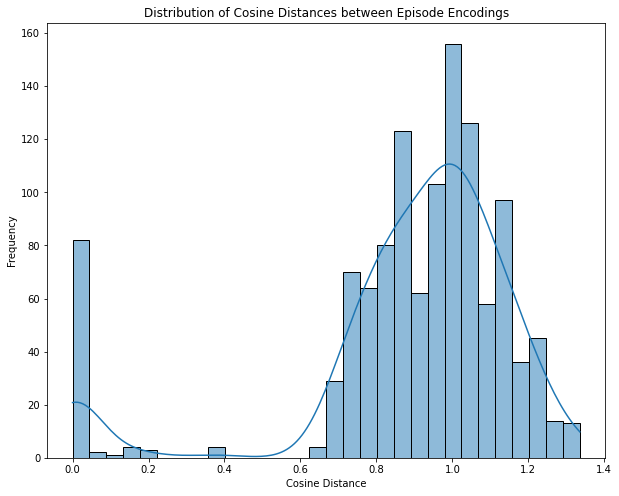

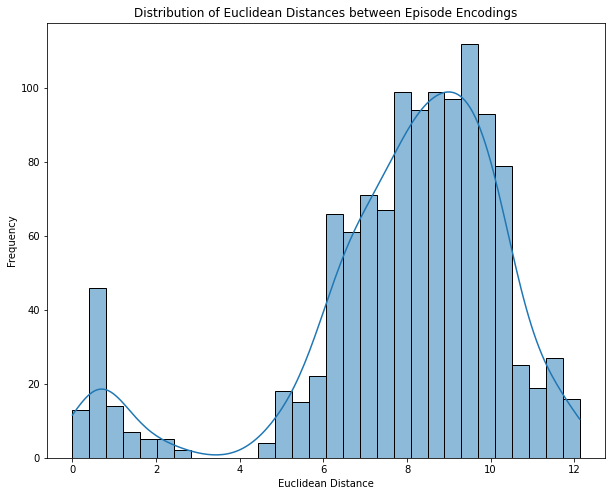

In [111]:
# Calculate pairwise similarities and distances between all z encodings along the feature dimension
cosine_distances = []
euclidean_distances = []
for i in range(len(z_encodings)):
    for j in range(i + 1, len(z_encodings)):
        cosine_distance, euclidean_distance = calculate_similarity_encoding(z_encodings[i], z_encodings[j])
        cosine_distances.append({
            'task_1': labels[i][0],
            'outcome_1': labels[i][1],
            'task_2': labels[j][0],
            'outcome_2': labels[j][1],
            'cosine_distance': cosine_distance.item(),
            'euclidean_distance': euclidean_distance.item()
        })

# Convert distances to a DataFrame for analysis
df_distances = pd.DataFrame(cosine_distances)

# Display the first few entries of the dataframe for verification
print(df_distances.head())

# Example visualization of cosine distance
plt.figure(figsize=(10, 8))
sns.histplot(df_distances['cosine_distance'], bins=30, kde=True)
plt.title('Distribution of Cosine Distances between Episode Encodings')
plt.xlabel('Cosine Distance')
plt.ylabel('Frequency')
plt.show()

# Example visualization of Euclidean distance
plt.figure(figsize=(10, 8))
sns.histplot(df_distances['euclidean_distance'], bins=30, kde=True)
plt.title('Distribution of Euclidean Distances between Episode Encodings')
plt.xlabel('Euclidean Distance')
plt.ylabel('Frequency')
plt.show()

In [19]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def compute_clusters(z_encodings, labels):
    z_encodings_np = z_encodings.cpu().detach().numpy()  # Convert to numpy for sklearn
    n_clusters = len(tasks)  # Total number of tasks as the number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    z_encodings_np = z_encodings_np.squeeze(1)
    cluster_labels = kmeans.fit_predict(z_encodings_np)

    # Map cluster labels to the original task names for analysis
    df_clusters = pd.DataFrame({
        'task': [label[0] for label in labels],  # Original task names
        'outcome': [label[1] for label in labels],  # Success/Failure outcome
        'cluster': cluster_labels
    })



    # Visualize the clusters using PCA for dimensionality reduction
    pca = PCA(n_components=2)
    z_encodings_pca = pca.fit_transform(z_encodings_np)

    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x=z_encodings_pca[:, 0], y=z_encodings_pca[:, 1],
        hue=df_clusters['task'], style=df_clusters['outcome'],
        palette='tab10', s=100
    )
    plt.title('K-means Clustering of Episode Encodings (PCA Reduced)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(loc='best', bbox_to_anchor=(1.05, 1), title='Task')
    plt.tight_layout()
    plt.show()

    # Evaluate clustering by task
    print("Cluster counts per task:")
    print(df_clusters.groupby(['task', 'cluster']).size())
    return df_clusters
    

In [ ]:
pip install omniplot

In [16]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def compute_clusters_ply(z_encodings, labels):
    # Convert tensor to numpy
    z_encodings_np = z_encodings.cpu().detach().numpy().squeeze(1)
    
    # Determine the number of clusters
    n_clusters = len(tasks)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(z_encodings_np)
    
    # Create DataFrame
    df_clusters = pd.DataFrame({
        'task': [label[0] for label in labels],
        'outcome': [label[1] for label in labels],
        'cluster': cluster_labels
    })

    # Perform PCA
    pca = PCA(n_components=2)
    z_encodings_pca = pca.fit_transform(z_encodings_np)
    df_clusters["PCA1"], df_clusters["PCA2"] = z_encodings_pca[:, 0], z_encodings_pca[:, 1]

    # Plotly Scatter Plot
    fig = px.scatter(df_clusters, x="PCA1", y="PCA2", color="task", symbol="outcome",
                     title="K-Means Clustering of Episode Encodings (PCA Reduced)",
                     labels={"PCA1": "PCA Component 1", "PCA2": "PCA Component 2"},
                     size_max=15, opacity=0.8)

    fig.update_traces(marker=dict(size=10, line=dict(width=1, color='black')))
    fig.show()

    return df_clusters


In [26]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def compute_clusters_ply(z_encodings, labels):
    # Convert tensor to numpy
    z_encodings_np = z_encodings.cpu().detach().numpy().squeeze(1)
    
    # Determine the number of clusters
    n_clusters = len(tasks)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(z_encodings_np)
    
    # Create DataFrame
    df_clusters = pd.DataFrame({
        'task': [label[0] for label in labels],  # Task name
        'outcome': [label[1] for label in labels],  # True/False outcome
        'cluster': cluster_labels
    })

    # Perform PCA
    pca = PCA(n_components=2)
    z_encodings_pca = pca.fit_transform(z_encodings_np)
    df_clusters["PCA1"], df_clusters["PCA2"] = z_encodings_pca[:, 0], z_encodings_pca[:, 1]

    # Define symbols: True = "circle", False = "x"
    outcome_symbols = {True: "circle", False: "x"}
    
    # Plotly Scatter Plot
    fig = px.scatter(df_clusters, x="PCA1", y="PCA2", 
                     color="task", symbol="outcome", 
                     symbol_map=outcome_symbols,  # Assign symbols
                     title="K-Means Clustering of Episode Encodings (PCA Reduced)",
                     labels={"PCA1": "PCA Component 1", "PCA2": "PCA Component 2"},
                     size_max=15, opacity=0.8)

    # Adjust marker properties for visibility
    fig.update_traces(marker=dict(size=10, line=dict(width=1, color='black')))

    # Show plot
    fig.show()

    return df_clusters


In [113]:
import pandas as pd
from collections import defaultdict

# Assuming `df_clusters` contains the following columns:
# - 'task': the name of the task (e.g., 'CreateLevelPush-v0')
# - 'outcome': the outcome of the episode ('true' for success, 'false' for failure)
# - 'cluster': the assigned cluster label by KMeans

# Group the DataFrame by task and outcome

def calculate_clusters_purity(df_clusters):
    grouped_by_task = df_clusters.groupby(['task', 'outcome'])

    # Store the results
    results = defaultdict(list)

    # Check if all successful episodes of each task have been clustered together
    for (task, outcome), group in grouped_by_task:
        cluster_counts = group['cluster'].value_counts()
        dominant_cluster = cluster_counts.idxmax()  # The cluster with the most episodes for this task-outcome pair
        is_pure_cluster = len(cluster_counts) == 1  # True if all episodes belong to the same cluster
        purity = cluster_counts[dominant_cluster] / len(group)  # Purity of the cluster (percentage of episodes in the dominant cluster)

        results[task, outcome] = {
        'dominant_cluster': dominant_cluster,
        'is_pure_cluster': is_pure_cluster,
        'purity': purity,
        'total_episodes': len(group),
        'episodes_in_dominant_cluster': cluster_counts[dominant_cluster]
        }

    # Display the results for analysis
    for (task, outcome), result in results.items():
        print(f"Task: {task}, Outcome: {outcome}")
        print(f"  Dominant Cluster: {result['dominant_cluster']}")
        print(f"  All Episodes in Same Cluster: {result['is_pure_cluster']}")
        print(f"  Purity of Cluster: {result['purity'] * 100:.2f}%")
        print(f"  Total Episodes: {result['total_episodes']}")
        print(f"  Episodes in Dominant Cluster: {result['episodes_in_dominant_cluster']}\n")


In [17]:
for idx, z_encodings in enumerate(z_encodings_diff_checkpoints):
    df_clusters = compute_clusters_ply(z_encodings, z_encoding_labels[idx])
    

In [19]:
len(z_encodings_diff_checkpoints)

6

In [56]:
df_clusters = compute_clusters_ply(bad_z_encodings_diff_checkpoints[3], z_encoding_labels[5])


In [115]:
def compute_clusters_only_tasks(z_encodings, labels, tasks):
    # Convert tensor to numpy for sklearn compatibility
    z_encodings_np = z_encodings.cpu().detach().numpy()
    z_encodings_np = z_encodings_np.squeeze(1)  # Ensure the encodings are 2D: [num_samples, feature_dim]

    # Define number of clusters as the number of unique tasks
    n_clusters = len(tasks)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(z_encodings_np)

    # Map cluster labels to the original task names for analysis (excluding outcome)
    df_clusters = pd.DataFrame({
        'task': [label[0] for label in labels],  # Original task names only
        'cluster': cluster_labels
    })

    # Visualize the clusters using PCA for dimensionality reduction
    pca = PCA(n_components=2)
    z_encodings_pca = pca.fit_transform(z_encodings_np)

    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x=z_encodings_pca[:, 0], y=z_encodings_pca[:, 1],
        hue=df_clusters['task'],  # Color by task only
        palette='tab10', s=100
    )
    plt.title('K-means Clustering of Episode Encodings (PCA Reduced) by Task')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(loc='best', bbox_to_anchor=(1.05, 1), title='Task')
    plt.tight_layout()
    plt.show()

    # Evaluate clustering by task
    print("Cluster counts per task:")
    print(df_clusters.groupby(['task', 'cluster']).size())

    return df_clusters

In [40]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def compute_clusters_only_tasks_ply(z_encodings, labels, tasks):
    # Convert tensor to numpy for sklearn compatibility
    z_encodings_np = z_encodings.cpu().detach().numpy().squeeze(1)  # Ensure 2D shape

    # Define number of clusters as the number of unique tasks
    n_clusters = len(tasks)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(z_encodings_np)

    # Create DataFrame (includes outcome for filtering)
    df_clusters = pd.DataFrame({
        'task': [label[0] for label in labels],  # Task names only
        'outcome': [label[1] for label in labels],  # True/False outcome
        'cluster': cluster_labels
    })

    # Filter only the positive outcomes (True)
    df_clusters = df_clusters[df_clusters['outcome'] == 'false']

    # Perform PCA for visualization
    pca = PCA(n_components=2)
    z_encodings_pca = pca.fit_transform(z_encodings_np)
    df_clusters["PCA1"], df_clusters["PCA2"] = z_encodings_pca[df_clusters.index, 0], z_encodings_pca[df_clusters.index, 1]

    # Create interactive Plotly Scatter Plot
    fig = px.scatter(df_clusters, x="PCA1", y="PCA2", 
                     color="task",  # Color by task only
                     title="K-Means Clustering of Positive Outcomes (PCA Reduced) by Task",
                     labels={"PCA1": "PCA Component 1", "PCA2": "PCA Component 2"},
                     size_max=15, opacity=0.8)

    # Improve marker visibility
    fig.update_traces(marker=dict(size=10, line=dict(width=1, color='black')))

    # Show the interactive plot
    fig.show()

    # Print clustering results
    print("\nCluster counts per task (Positive Outcomes Only):")
    print(df_clusters.groupby(['task', 'cluster']).size())

    return df_clusters


In [41]:
for idx, z_encodings in enumerate(z_encodings_diff_checkpoints):
    df_clusters = compute_clusters_only_tasks_ply(z_encodings, z_encoding_labels[idx], tasks)
    


Cluster counts per task (Positive Outcomes Only):
task                    cluster
CreateLevelBasket-v0    1          5
CreateLevelBelt-v0      3          5
CreateLevelBuckets-v0   4          5
CreateLevelObstacle-v0  0          5
CreateLevelPush-v0      1          5
dtype: int64



Cluster counts per task (Positive Outcomes Only):
task                    cluster
CreateLevelBasket-v0    1          5
CreateLevelBelt-v0      3          5
CreateLevelBuckets-v0   1          5
CreateLevelObstacle-v0  2          5
CreateLevelPush-v0      1          5
dtype: int64



Cluster counts per task (Positive Outcomes Only):
task                    cluster
CreateLevelBasket-v0    0          5
CreateLevelBelt-v0      1          5
CreateLevelBuckets-v0   0          5
CreateLevelObstacle-v0  3          5
CreateLevelPush-v0      2          5
dtype: int64



Cluster counts per task (Positive Outcomes Only):
task                    cluster
CreateLevelBasket-v0    0          5
CreateLevelBelt-v0      4          5
CreateLevelBuckets-v0   1          4
CreateLevelObstacle-v0  3          5
CreateLevelPush-v0      1          5
dtype: int64



Cluster counts per task (Positive Outcomes Only):
task                    cluster
CreateLevelBasket-v0    2          5
CreateLevelBelt-v0      3          5
CreateLevelBuckets-v0   1          5
CreateLevelObstacle-v0  2          5
CreateLevelPush-v0      4          5
dtype: int64



Cluster counts per task (Positive Outcomes Only):
task                    cluster
CreateLevelBasket-v0    0          5
CreateLevelBelt-v0      2          5
CreateLevelBuckets-v0   0          5
CreateLevelObstacle-v0  4          5
CreateLevelPush-v0      3          5
dtype: int64


In [59]:
df_clusters = compute_clusters_only_tasks_ply(bad_z_encodings_diff_checkpoints[1], z_encoding_labels[5], tasks)



Cluster counts per task (Positive Outcomes Only):
task                    cluster
CreateLevelBasket-v0    0          2
                        1          3
CreateLevelBelt-v0      3          5
CreateLevelBuckets-v0   1          5
CreateLevelObstacle-v0  0          5
CreateLevelPush-v0      0          5
dtype: int64


In [117]:
def compute_clusters_by_outcome(z_encodings, labels, tasks):
    # Convert tensor to numpy for sklearn compatibility
    z_encodings_np = z_encodings.cpu().detach().numpy()
    z_encodings_np = z_encodings_np.squeeze(1)  # Ensure the encodings are 2D: [num_samples, feature_dim]

    # Prepare dataframes for success and failure episodes
    df = pd.DataFrame({
        'task': [label[0] for label in labels],  # Original task names
        'outcome': [label[1] for label in labels]  # Success/Failure outcome
    })
    
    # Filter the encodings based on success and failure
    success_indices = df[df['outcome'] == 'true'].index
    failure_indices = df[df['outcome'] == 'false'].index

    z_success = z_encodings_np[success_indices]
    z_failure = z_encodings_np[failure_indices]

    # Define number of clusters as the number of unique tasks
    n_clusters = len(tasks)

    # Perform K-means clustering on successful episodes
    kmeans_success = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels_success = kmeans_success.fit_predict(z_success)
    
    # Create a DataFrame for successful episodes with their cluster labels
    df_clusters_success = pd.DataFrame({
        'task': df.loc[success_indices, 'task'].values,
        'cluster': cluster_labels_success
    })

    # Perform K-means clustering on unsuccessful episodes
    kmeans_failure = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels_failure = kmeans_failure.fit_predict(z_failure)

    # Create a DataFrame for unsuccessful episodes with their cluster labels
    df_clusters_failure = pd.DataFrame({
        'task': df.loc[failure_indices, 'task'].values,
        'cluster': cluster_labels_failure
    })

    # Visualize the clusters for successful episodes using PCA
    pca_success = PCA(n_components=2)
    z_success_pca = pca_success.fit_transform(z_success)
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x=z_success_pca[:, 0], y=z_success_pca[:, 1],
        hue=df_clusters_success['task'],
        palette='tab10', s=100
    )
    plt.title('K-means Clustering of Successful Episodes (PCA Reduced)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(loc='best', bbox_to_anchor=(1.05, 1), title='Task')
    plt.tight_layout()
    plt.show()

    # Visualize the clusters for unsuccessful episodes using PCA
    pca_failure = PCA(n_components=2)
    z_failure_pca = pca_failure.fit_transform(z_failure)
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x=z_failure_pca[:, 0], y=z_failure_pca[:, 1],
        hue=df_clusters_failure['task'],
        palette='tab10', s=100
    )
    plt.title('K-means Clustering of Unsuccessful Episodes (PCA Reduced)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(loc='best', bbox_to_anchor=(1.05, 1), title='Task')
    plt.tight_layout()
    plt.show()

    # Evaluate clustering by task for success
    print("Cluster counts per task for successful episodes:")
    print(df_clusters_success.groupby(['task', 'cluster']).size())

    # Evaluate clustering by task for failure
    print("\nCluster counts per task for unsuccessful episodes:")
    print(df_clusters_failure.groupby(['task', 'cluster']).size())

    return df_clusters_success, df_clusters_failure

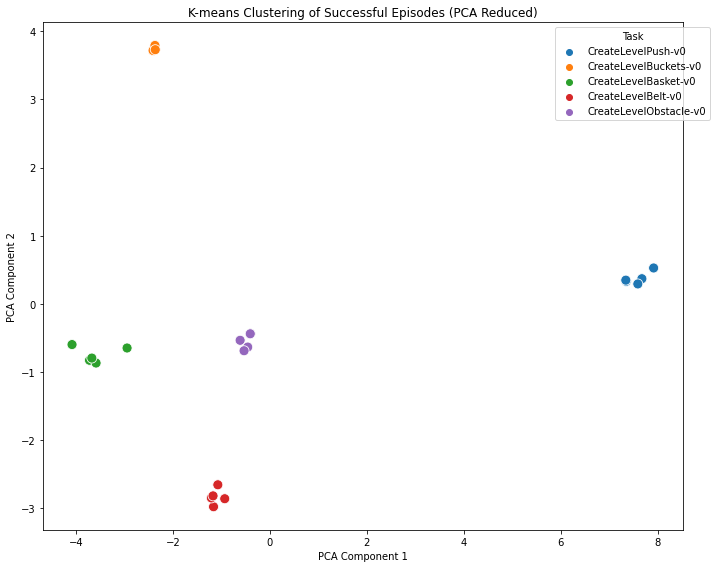

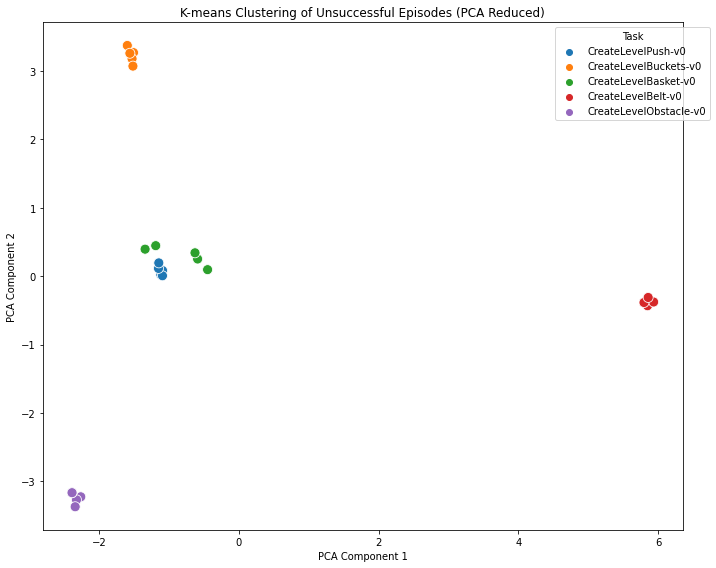

Cluster counts per task for successful episodes:
task                    cluster
CreateLevelBasket-v0    3          5
CreateLevelBelt-v0      2          5
CreateLevelBuckets-v0   0          5
CreateLevelObstacle-v0  4          5
CreateLevelPush-v0      1          5
dtype: int64

Cluster counts per task for unsuccessful episodes:
task                    cluster
CreateLevelBasket-v0    3          5
CreateLevelBelt-v0      2          5
CreateLevelBuckets-v0   0          5
CreateLevelObstacle-v0  4          5
CreateLevelPush-v0      1          5
dtype: int64


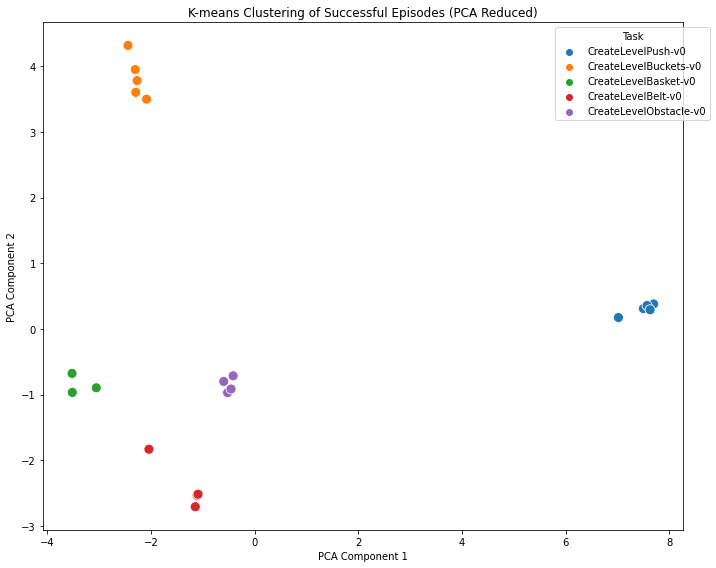

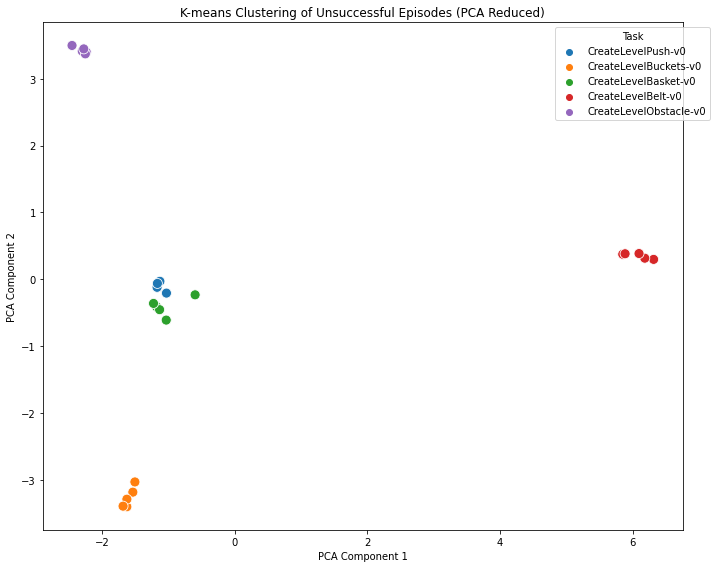

Cluster counts per task for successful episodes:
task                    cluster
CreateLevelBasket-v0    3          5
CreateLevelBelt-v0      2          5
CreateLevelBuckets-v0   0          5
CreateLevelObstacle-v0  4          5
CreateLevelPush-v0      1          5
dtype: int64

Cluster counts per task for unsuccessful episodes:
task                    cluster
CreateLevelBasket-v0    3          5
CreateLevelBelt-v0      2          5
CreateLevelBuckets-v0   0          5
CreateLevelObstacle-v0  4          5
CreateLevelPush-v0      1          5
dtype: int64


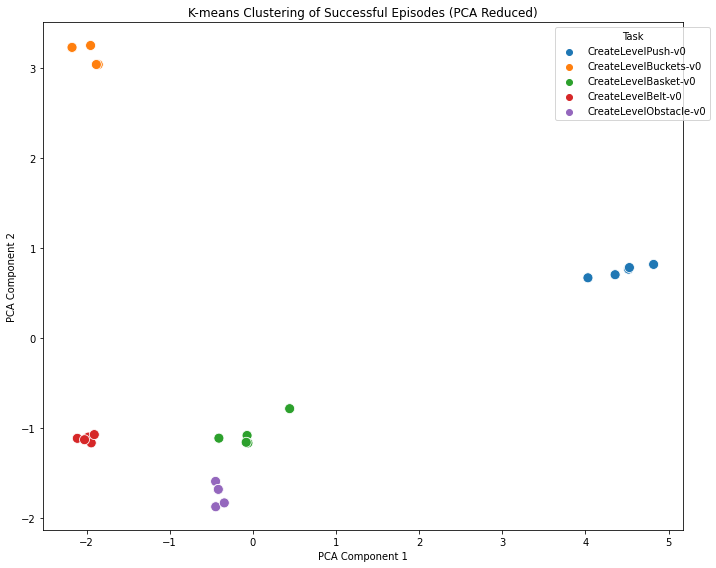

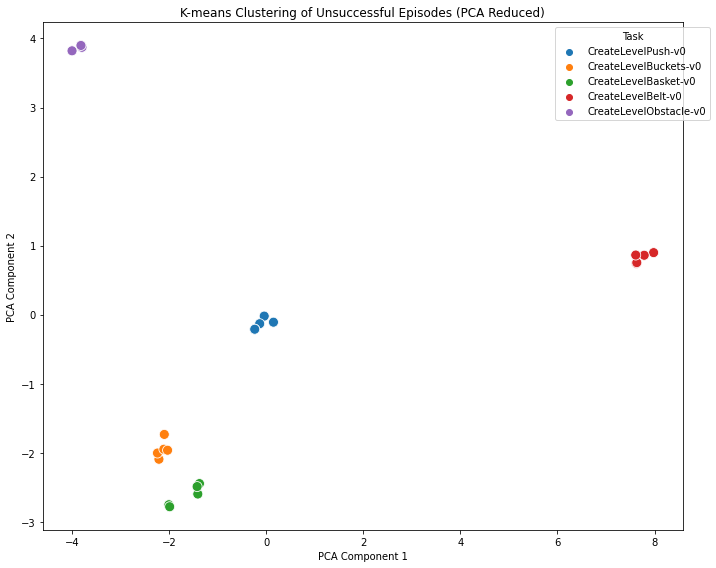

Cluster counts per task for successful episodes:
task                    cluster
CreateLevelBasket-v0    3          5
CreateLevelBelt-v0      4          5
CreateLevelBuckets-v0   0          5
CreateLevelObstacle-v0  1          5
CreateLevelPush-v0      2          5
dtype: int64

Cluster counts per task for unsuccessful episodes:
task                    cluster
CreateLevelBasket-v0    3          5
CreateLevelBelt-v0      1          5
CreateLevelBuckets-v0   0          5
CreateLevelObstacle-v0  4          5
CreateLevelPush-v0      2          5
dtype: int64


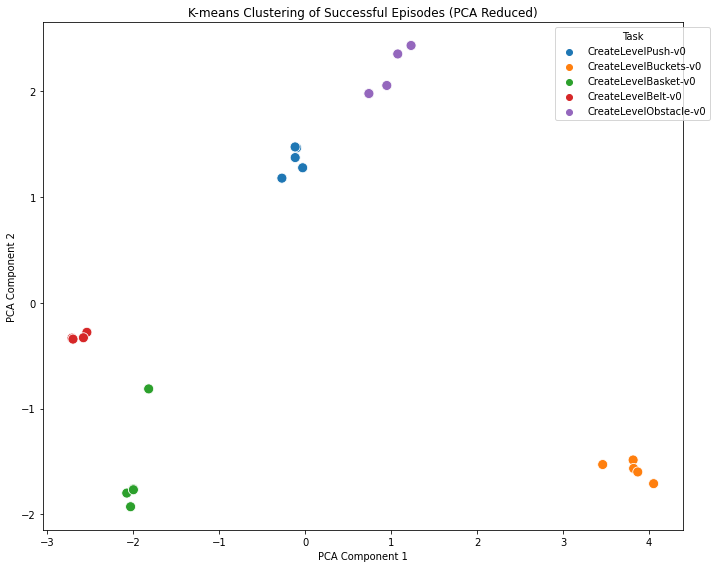

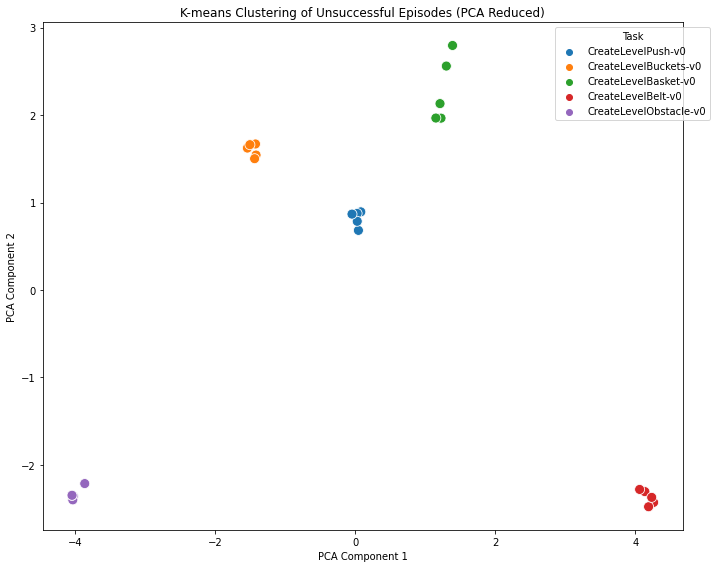

Cluster counts per task for successful episodes:
task                    cluster
CreateLevelBasket-v0    3          5
CreateLevelBelt-v0      2          5
CreateLevelBuckets-v0   0          5
CreateLevelObstacle-v0  4          5
CreateLevelPush-v0      1          5
dtype: int64

Cluster counts per task for unsuccessful episodes:
task                    cluster
CreateLevelBasket-v0    3          5
CreateLevelBelt-v0      2          5
CreateLevelBuckets-v0   0          5
CreateLevelObstacle-v0  4          5
CreateLevelPush-v0      1          5
dtype: int64


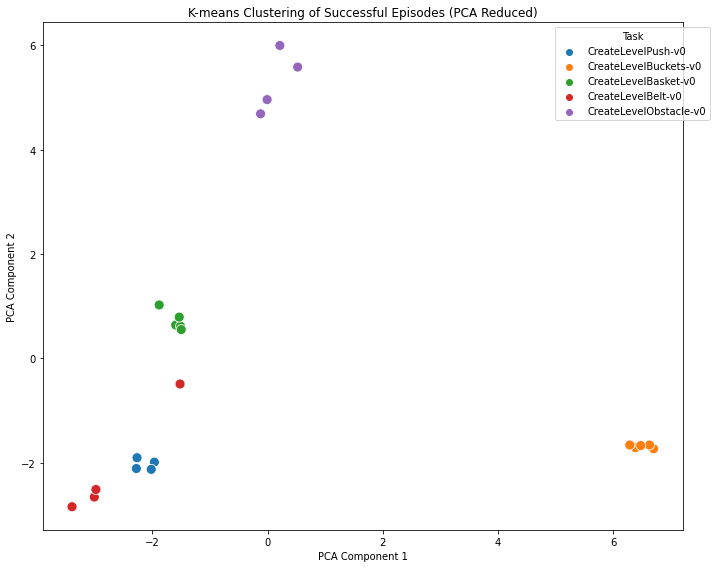

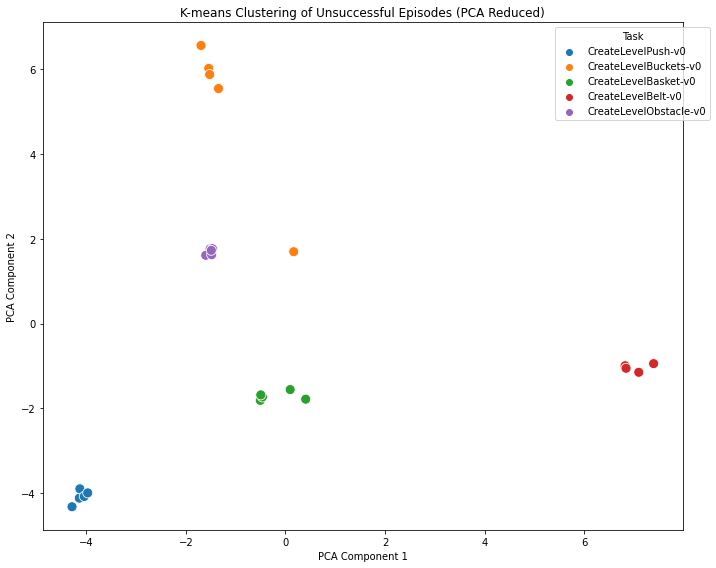

Cluster counts per task for successful episodes:
task                    cluster
CreateLevelBasket-v0    2          5
CreateLevelBelt-v0      3          5
CreateLevelBuckets-v0   0          5
CreateLevelObstacle-v0  4          5
CreateLevelPush-v0      1          5
dtype: int64

Cluster counts per task for unsuccessful episodes:
task                    cluster
CreateLevelBasket-v0    1          5
CreateLevelBelt-v0      2          5
CreateLevelBuckets-v0   0          4
                        1          1
CreateLevelObstacle-v0  4          5
CreateLevelPush-v0      3          5
dtype: int64


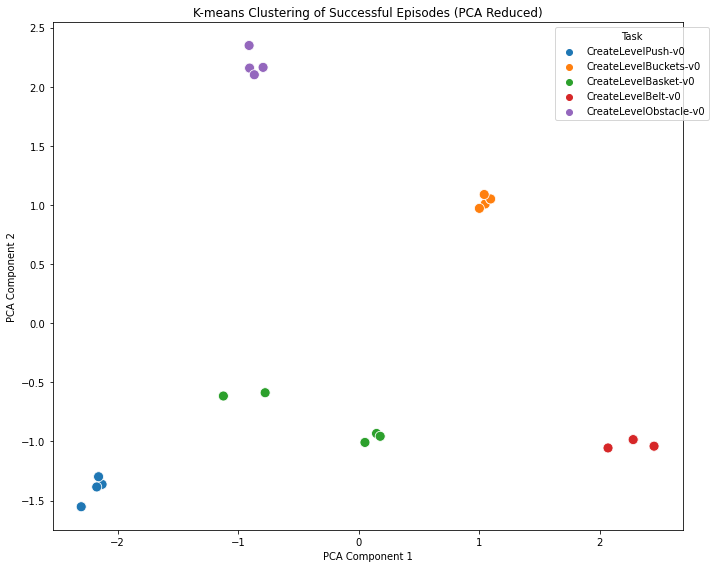

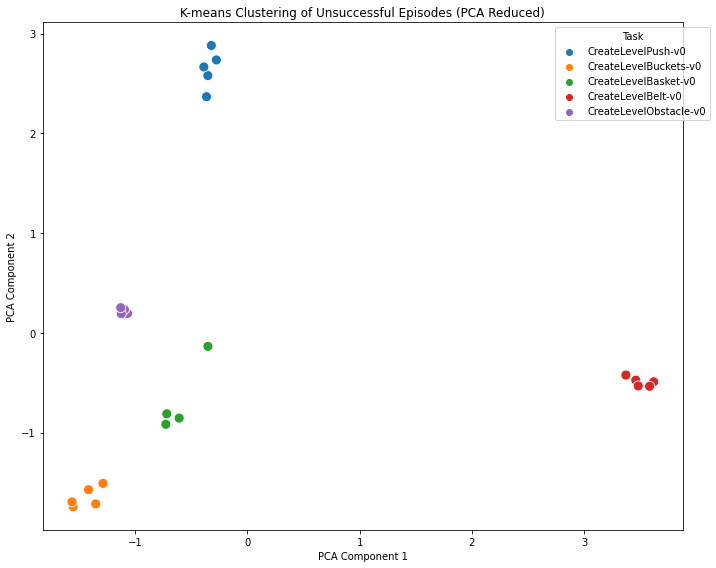

Cluster counts per task for successful episodes:
task                    cluster
CreateLevelBasket-v0    3          5
CreateLevelBelt-v0      2          5
CreateLevelBuckets-v0   0          5
CreateLevelObstacle-v0  4          5
CreateLevelPush-v0      1          5
dtype: int64

Cluster counts per task for unsuccessful episodes:
task                    cluster
CreateLevelBasket-v0    1          5
CreateLevelBelt-v0      2          5
CreateLevelBuckets-v0   0          5
CreateLevelObstacle-v0  4          5
CreateLevelPush-v0      3          5
dtype: int64


In [118]:
for idx, z_encodings in enumerate(z_encodings_diff_checkpoints):
    df_clusters_s, df_clusters_fail = compute_clusters_by_outcome(z_encodings, z_encoding_labels[idx], tasks)
    

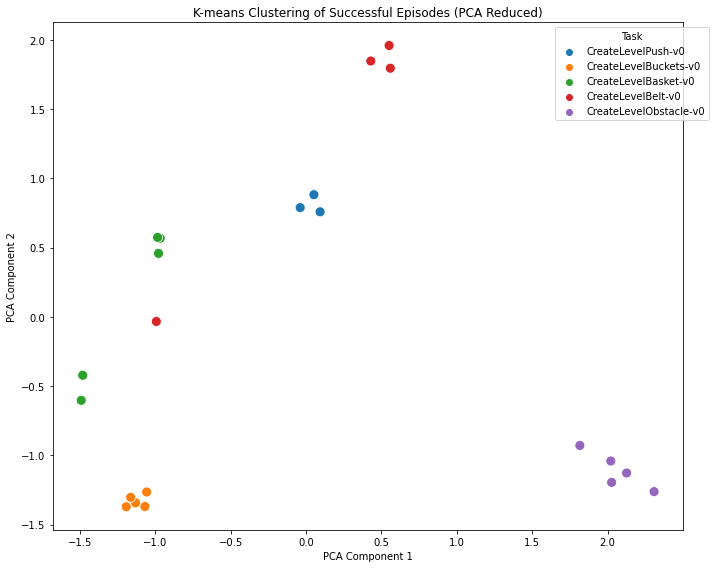

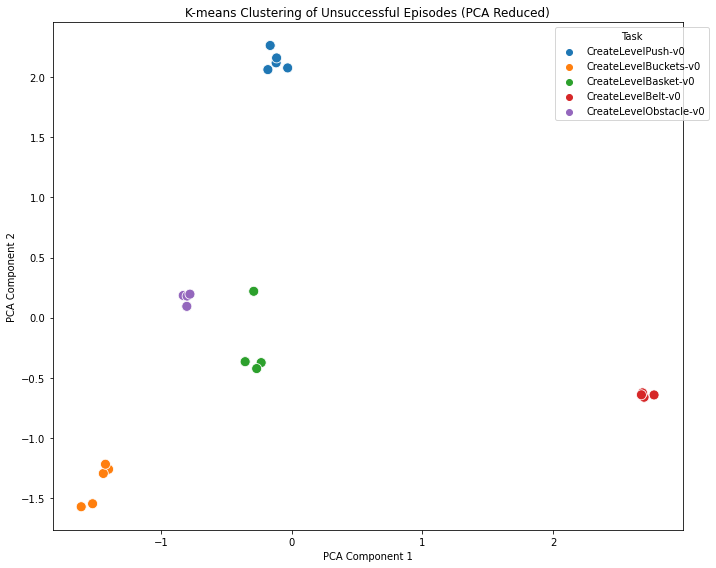

Cluster counts per task for successful episodes:
task                    cluster
CreateLevelBasket-v0    0          2
                        3          3
CreateLevelBelt-v0      0          1
                        4          4
CreateLevelBuckets-v0   0          5
CreateLevelObstacle-v0  1          5
CreateLevelPush-v0      2          5
dtype: int64

Cluster counts per task for unsuccessful episodes:
task                    cluster
CreateLevelBasket-v0    3          5
CreateLevelBelt-v0      2          5
CreateLevelBuckets-v0   0          5
CreateLevelObstacle-v0  4          5
CreateLevelPush-v0      1          5
dtype: int64


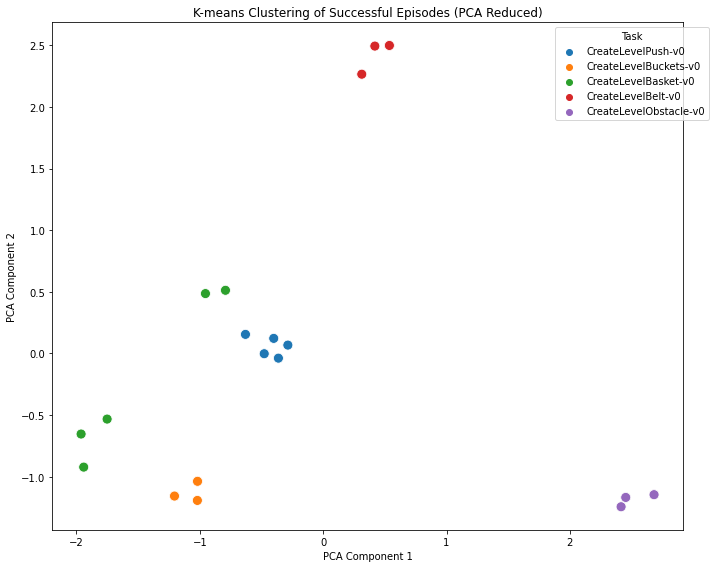

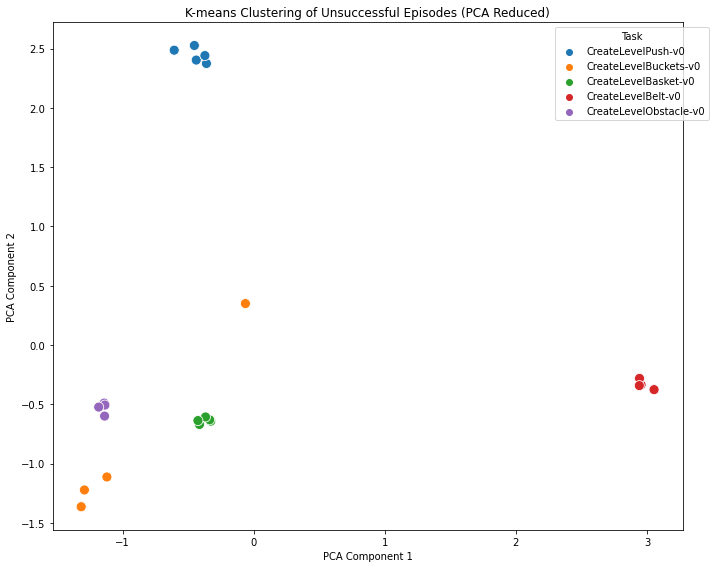

Cluster counts per task for successful episodes:
task                    cluster
CreateLevelBasket-v0    2          2
                        3          3
CreateLevelBelt-v0      4          5
CreateLevelBuckets-v0   0          5
CreateLevelObstacle-v0  1          5
CreateLevelPush-v0      2          5
dtype: int64

Cluster counts per task for unsuccessful episodes:
task                    cluster
CreateLevelBasket-v0    0          5
CreateLevelBelt-v0      4          5
CreateLevelBuckets-v0   0          1
                        2          4
CreateLevelObstacle-v0  1          5
CreateLevelPush-v0      3          5
dtype: int64


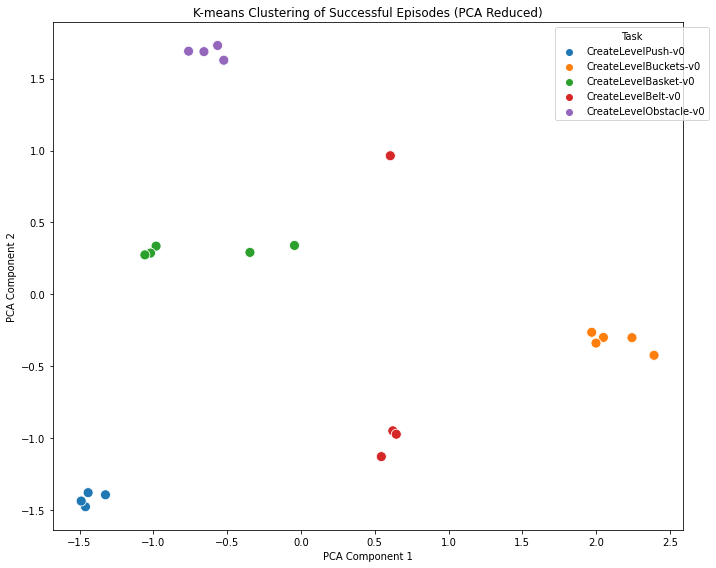

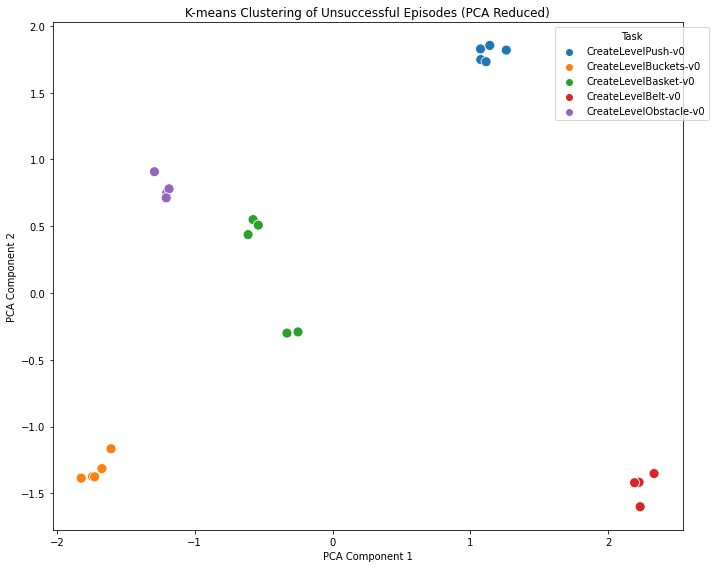

Cluster counts per task for successful episodes:
task                    cluster
CreateLevelBasket-v0    1          2
                        3          3
CreateLevelBelt-v0      1          2
                        4          3
CreateLevelBuckets-v0   0          5
CreateLevelObstacle-v0  1          5
CreateLevelPush-v0      2          5
dtype: int64

Cluster counts per task for unsuccessful episodes:
task                    cluster
CreateLevelBasket-v0    3          5
CreateLevelBelt-v0      2          5
CreateLevelBuckets-v0   0          5
CreateLevelObstacle-v0  4          5
CreateLevelPush-v0      1          5
dtype: int64


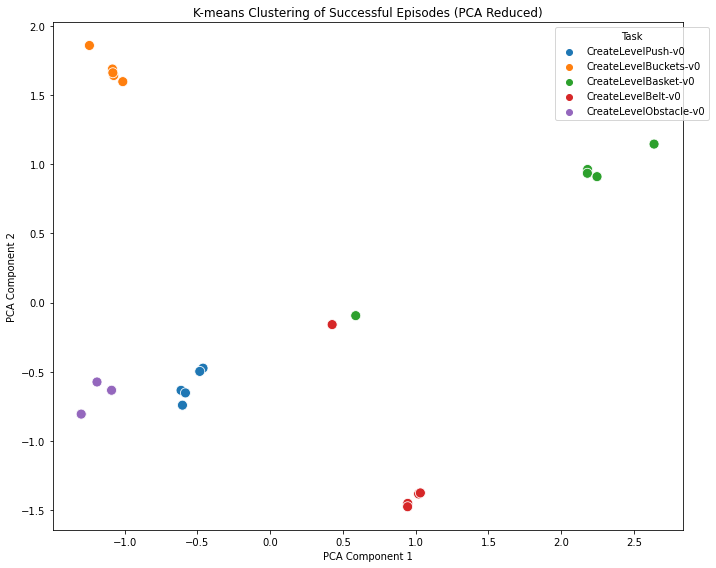

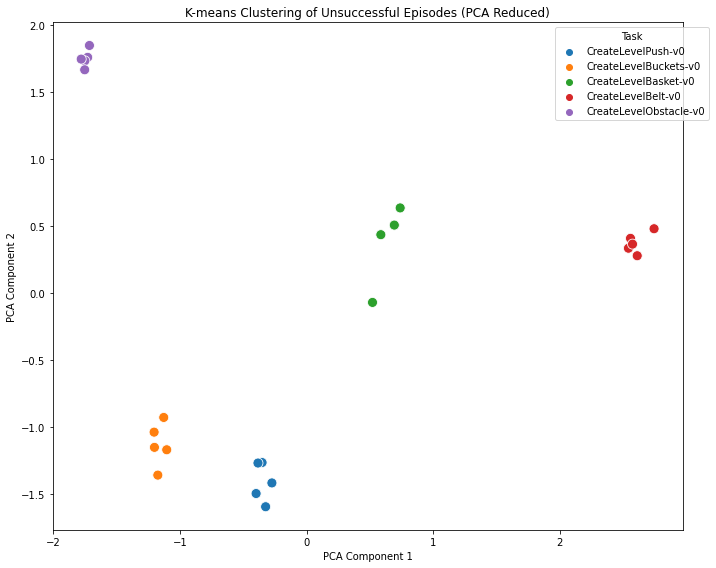

Cluster counts per task for successful episodes:
task                    cluster
CreateLevelBasket-v0    0          4
                        2          1
CreateLevelBelt-v0      2          1
                        4          4
CreateLevelBuckets-v0   3          5
CreateLevelObstacle-v0  1          5
CreateLevelPush-v0      2          5
dtype: int64

Cluster counts per task for unsuccessful episodes:
task                    cluster
CreateLevelBasket-v0    3          5
CreateLevelBelt-v0      2          5
CreateLevelBuckets-v0   0          5
CreateLevelObstacle-v0  4          5
CreateLevelPush-v0      1          5
dtype: int64


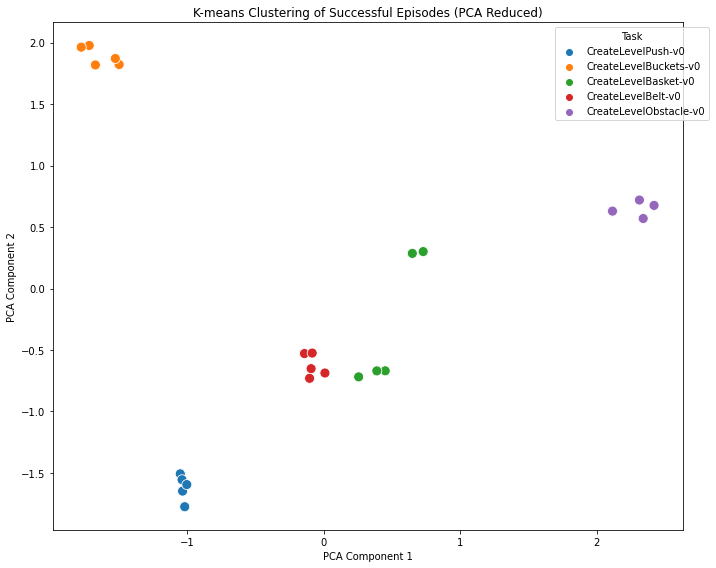

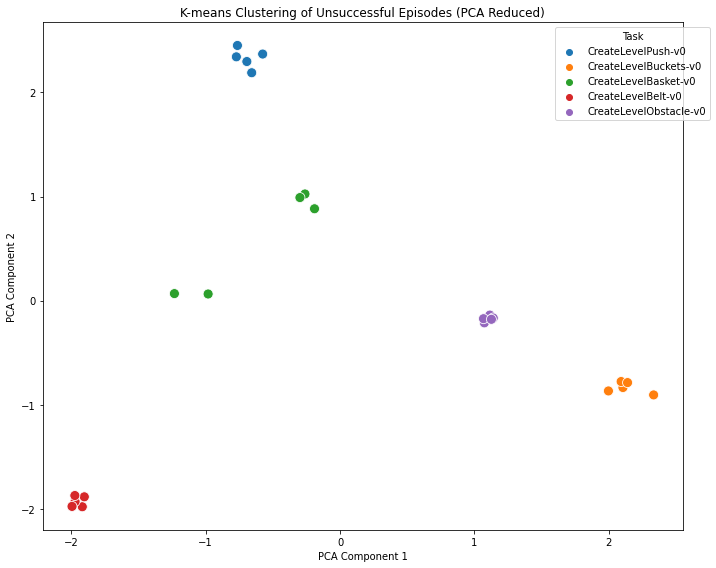

Cluster counts per task for successful episodes:
task                    cluster
CreateLevelBasket-v0    3          5
CreateLevelBelt-v0      2          5
CreateLevelBuckets-v0   0          5
CreateLevelObstacle-v0  4          5
CreateLevelPush-v0      1          5
dtype: int64

Cluster counts per task for unsuccessful episodes:
task                    cluster
CreateLevelBasket-v0    3          5
CreateLevelBelt-v0      2          5
CreateLevelBuckets-v0   0          5
CreateLevelObstacle-v0  4          5
CreateLevelPush-v0      1          5
dtype: int64


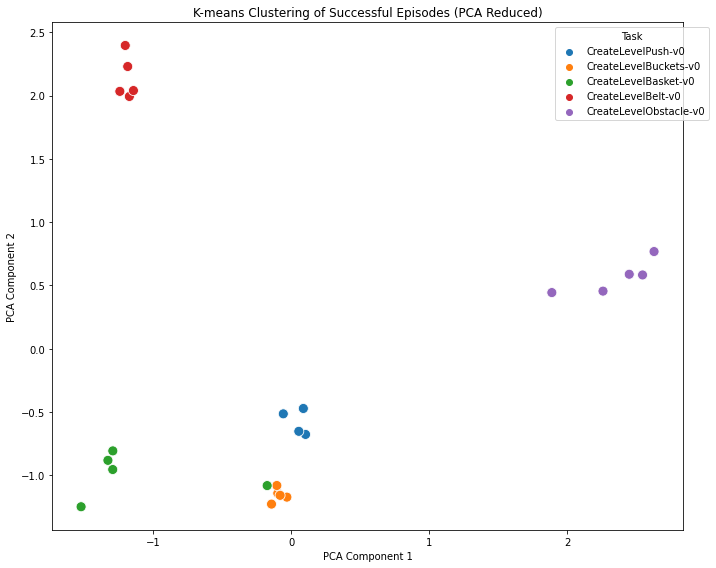

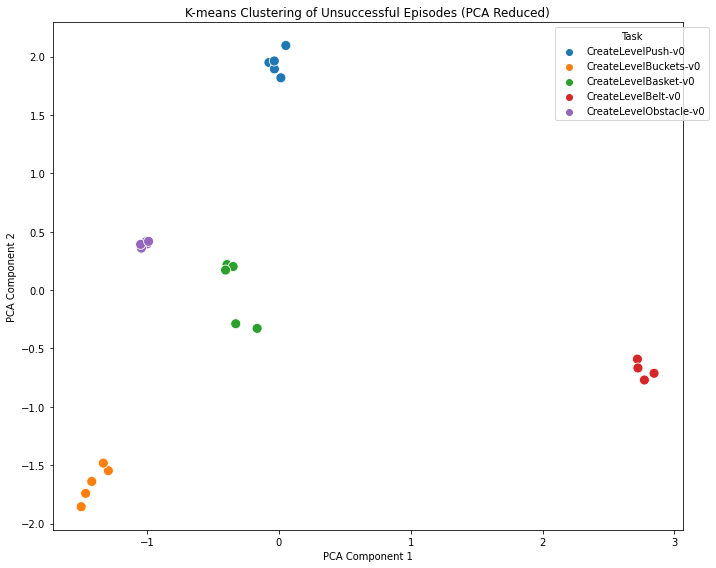

Cluster counts per task for successful episodes:
task                    cluster
CreateLevelBasket-v0    0          1
                        3          4
CreateLevelBelt-v0      4          5
CreateLevelBuckets-v0   0          5
CreateLevelObstacle-v0  1          5
CreateLevelPush-v0      2          5
dtype: int64

Cluster counts per task for unsuccessful episodes:
task                    cluster
CreateLevelBasket-v0    3          5
CreateLevelBelt-v0      2          5
CreateLevelBuckets-v0   0          5
CreateLevelObstacle-v0  4          5
CreateLevelPush-v0      1          5
dtype: int64


In [169]:
for idx, bad_z_encodings in enumerate(bad_z_encodings_diff_checkpoints):
    df_clusters_s, df_clusters_fail = compute_clusters_by_outcome(bad_z_encodings, bad_z_encoding_labels[idx], tasks)
    

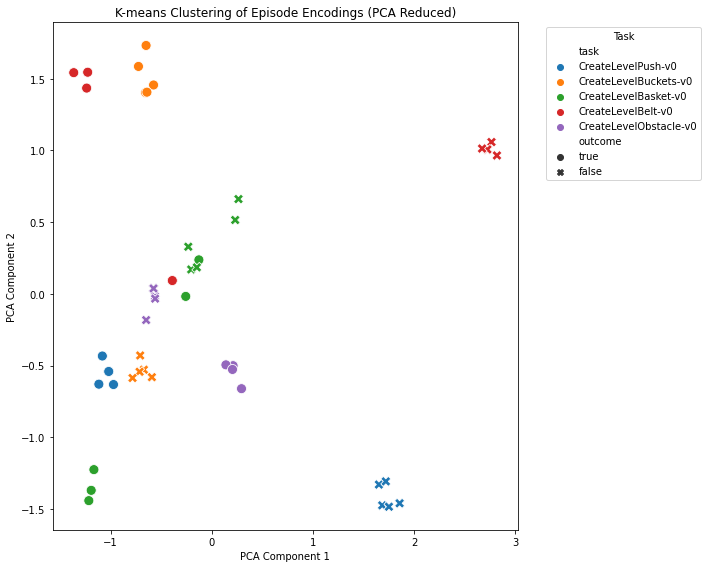

Cluster counts per task:
task                    cluster
CreateLevelBasket-v0    0          10
CreateLevelBelt-v0      2           5
                        3           5
CreateLevelBuckets-v0   2           5
                        4           5
CreateLevelObstacle-v0  0          10
CreateLevelPush-v0      0           5
                        1           5
dtype: int64


In [173]:
df_clusters = compute_clusters(bad_z_encodings_diff_checkpoints[2], bad_z_encoding_labels[2])
    

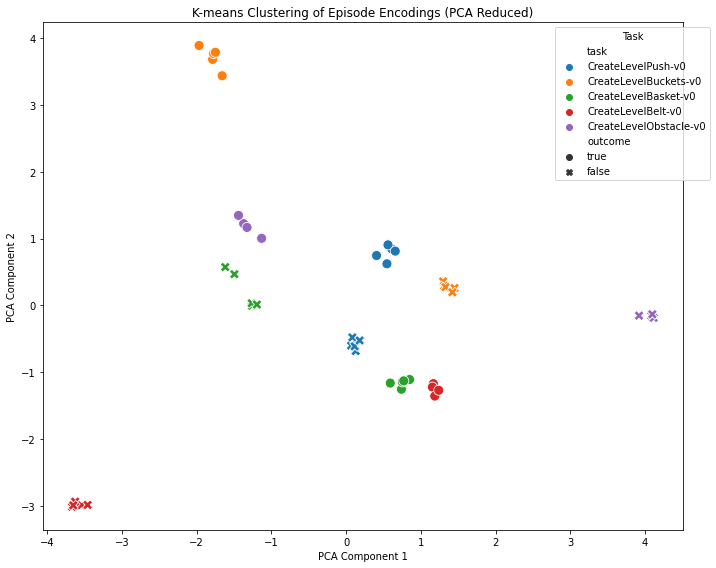

Cluster counts per task:
task                    cluster
CreateLevelBasket-v0    0           5
                        1           5
CreateLevelBelt-v0      1           5
                        2           5
CreateLevelBuckets-v0   1           5
                        4           5
CreateLevelObstacle-v0  0           5
                        3           5
CreateLevelPush-v0      1          10
dtype: int64


In [147]:
df_clusters = compute_clusters(z_encodings_diff_checkpoints[3], z_encoding_labels[3])
    

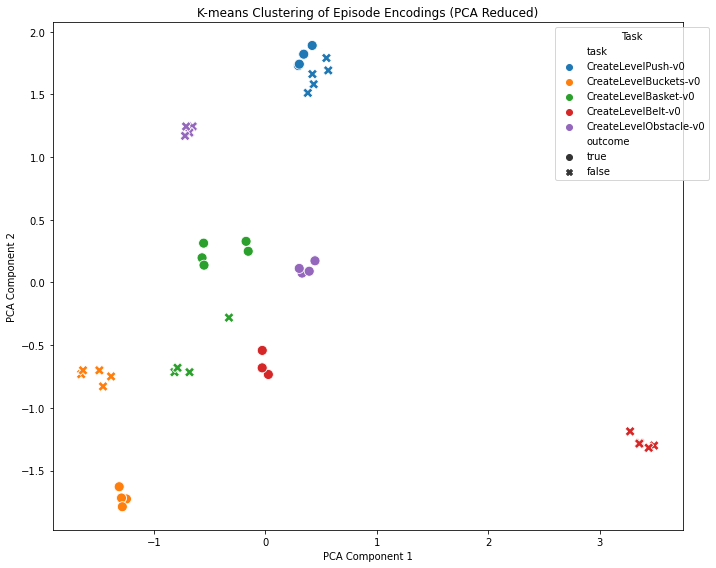

Cluster counts per task:
task                    cluster
CreateLevelBasket-v0    1           5
                        4           5
CreateLevelBelt-v0      0           5
                        2           5
CreateLevelBuckets-v0   4          10
CreateLevelObstacle-v0  1           5
                        4           5
CreateLevelPush-v0      1           5
                        3           5
dtype: int64


In [145]:
df_clusters = compute_clusters(z_encodings_diff_checkpoints[5], z_encoding_labels[5])


In [136]:
len(z_encodings_diff_checkpoints)

6

In [123]:
df_clusters_s, df_clusters_fail = compute_clusters_by_outcome(z_encodings[len(z_encodings)-1], z_encoding_labels[len(z_encodings)-1], tasks)


IndexError: list index out of range

                 task outcome  cluster
0  CreateLevelPush-v0    true        1
1  CreateLevelPush-v0    true        1
2  CreateLevelPush-v0    true        1
3  CreateLevelPush-v0    true        1
4  CreateLevelPush-v0    true        1


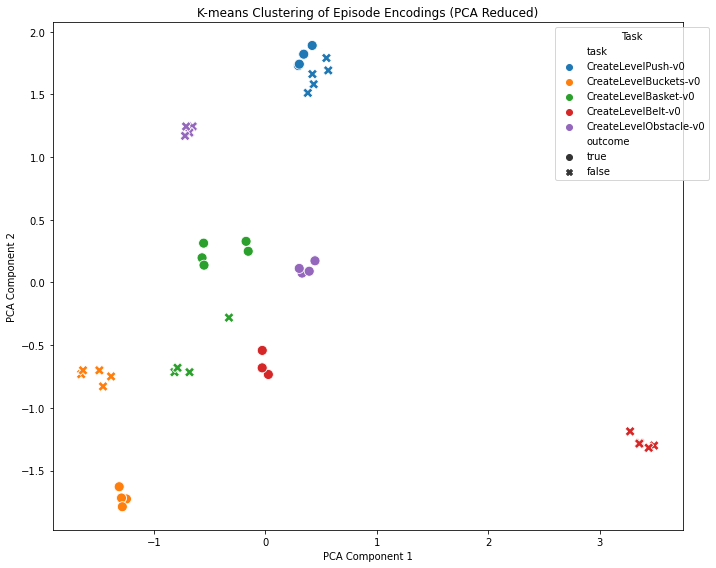

Cluster counts per task:
task                    cluster
CreateLevelBasket-v0    1           5
                        4           5
CreateLevelBelt-v0      0           5
                        2           5
CreateLevelBuckets-v0   4          10
CreateLevelObstacle-v0  1           5
                        4           5
CreateLevelPush-v0      1           5
                        3           5
dtype: int64


In [124]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


z_encodings_np = z_encodings.cpu().detach().numpy()  # Convert to numpy for sklearn
n_clusters = len(tasks)  # Total number of tasks as the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
z_encodings_np = z_encodings_np.squeeze(1)
cluster_labels = kmeans.fit_predict(z_encodings_np)

# Map cluster labels to the original task names for analysis
df_clusters = pd.DataFrame({
    'task': [label[0] for label in labels],  # Original task names
    'outcome': [label[1] for label in labels],  # Success/Failure outcome
    'cluster': cluster_labels
})

# Display the clustering result
print(df_clusters.head())

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
z_encodings_pca = pca.fit_transform(z_encodings_np)

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=z_encodings_pca[:, 0], y=z_encodings_pca[:, 1],
    hue=df_clusters['task'], style=df_clusters['outcome'],
    palette='tab10', s=100
)
plt.title('K-means Clustering of Episode Encodings (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), title='Task')
plt.tight_layout()
plt.show()

# Evaluate clustering by task
print("Cluster counts per task:")
print(df_clusters.groupby(['task', 'cluster']).size())

In [125]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

def compute_clusters_by_outcome_metrics(z_encodings, labels, tasks):
    # Convert tensor to numpy for sklearn compatibility
    z_encodings_np = z_encodings.cpu().detach().numpy()
    z_encodings_np = z_encodings_np.squeeze(1)  # Ensure the encodings are 2D: [num_samples, feature_dim]

    # Prepare dataframes for success and failure episodes
    df = pd.DataFrame({
        'task': [label[0] for label in labels],  # Original task names
        'outcome': [label[1] for label in labels]  # Success/Failure outcome
    })
    
    # Filter the encodings based on success and failure
    success_indices = df[df['outcome'] == 'true'].index
    failure_indices = df[df['outcome'] == 'false'].index

    z_success = z_encodings_np[success_indices]
    z_failure = z_encodings_np[failure_indices]

    # Define number of clusters as the number of unique tasks
    n_clusters = len(tasks)

    # Perform K-means clustering on successful episodes
    kmeans_success = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels_success = kmeans_success.fit_predict(z_success)
    
    # Calculate silhouette score for successful episodes
    silhouette_success = silhouette_score(z_success, cluster_labels_success)
    
    # Calculate Davies-Bouldin Index for successful episodes
    dbi_success = davies_bouldin_score(z_success, cluster_labels_success)
    
    # Calculate Dunn Index for successful episodes
    inter_cluster_distances = pdist(kmeans_success.cluster_centers_)
    intra_cluster_distances = np.max([np.mean(pdist(z_success[cluster_labels_success == i])) for i in range(n_clusters)])
    dunn_index_success = np.min(inter_cluster_distances) / intra_cluster_distances

    # Repeat clustering and metrics calculation for unsuccessful episodes
    kmeans_failure = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels_failure = kmeans_failure.fit_predict(z_failure)
    
    silhouette_failure = silhouette_score(z_failure, cluster_labels_failure)
    dbi_failure = davies_bouldin_score(z_failure, cluster_labels_failure)
    
    inter_cluster_distances_failure = pdist(kmeans_failure.cluster_centers_)
    intra_cluster_distances_failure = np.max([np.mean(pdist(z_failure[cluster_labels_failure == i])) for i in range(n_clusters)])
    dunn_index_failure = np.min(inter_cluster_distances_failure) / intra_cluster_distances_failure

    # Track metrics in a dictionary
    metrics = {
        'silhouette_success': silhouette_success,
        'silhouette_failure': silhouette_failure,
        'dbi_success': dbi_success,
        'dbi_failure': dbi_failure,
        'dunn_index_success': dunn_index_success,
        'dunn_index_failure': dunn_index_failure
    }
    
    return metrics

def evaluate_checkpoints(z_encodings_diff_checkpoints, z_encoding_labels, tasks):
    # Store metrics for each checkpoint
    all_metrics = []
    best_checkpoint = None
    best_score = -np.inf  # Track best score based on silhouette

    for idx, z_encodings in enumerate(z_encodings_diff_checkpoints):
        # Compute metrics for current checkpoint
        metrics = compute_clusters_by_outcome_metrics(z_encodings, z_encoding_labels[idx], tasks)
        all_metrics.append((idx, metrics))
        
        # Determine if this checkpoint has the best silhouette score
        current_score = max(metrics['silhouette_success'], metrics['silhouette_failure'])
        if current_score > best_score:
            best_score = current_score
            best_checkpoint = idx

        # Plot silhouette scores for successful and unsuccessful episodes
        plt.figure(figsize=(8, 6))
        plt.bar(['Silhouette Success', 'Silhouette Failure'], 
                [metrics['silhouette_success'], metrics['silhouette_failure']])
        plt.title(f'Checkpoint {idx}: Silhouette Scores')
        plt.xlabel('Episode Outcome')
        plt.ylabel('Silhouette Score')
        plt.show()

    print(f"Best checkpoint based on silhouette score: Checkpoint {best_checkpoint} with score {best_score}")
    
    return best_checkpoint, all_metrics


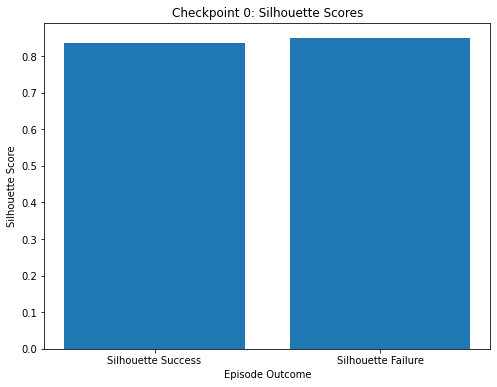

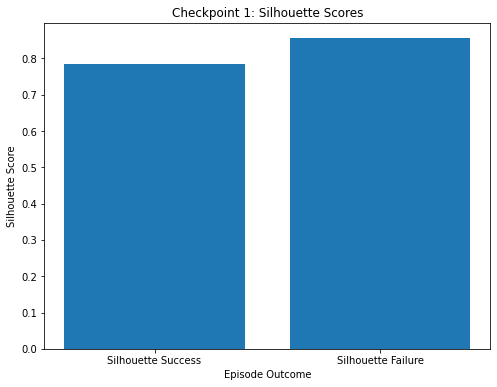

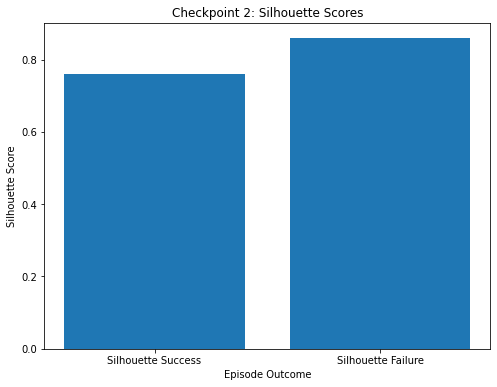

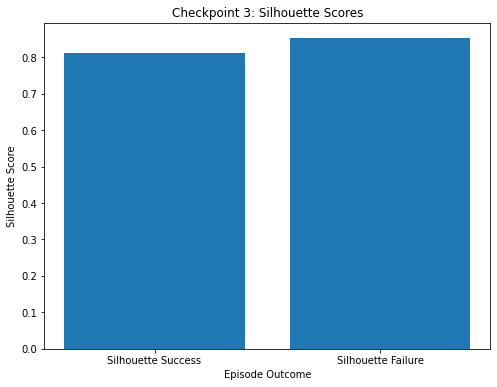

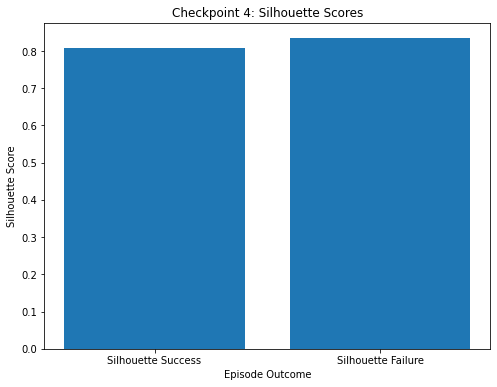

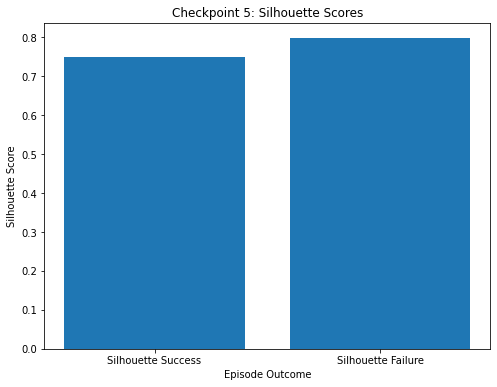

Best checkpoint based on silhouette score: Checkpoint 2 with score 0.8592212796211243


In [126]:
best_checkpoint, all_metrics = evaluate_checkpoints(z_encodings_diff_checkpoints, z_encoding_labels, tasks)


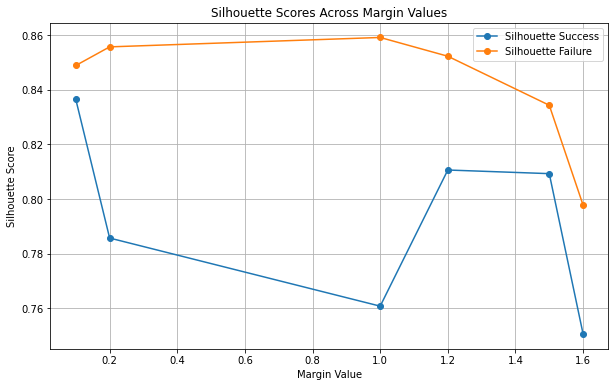

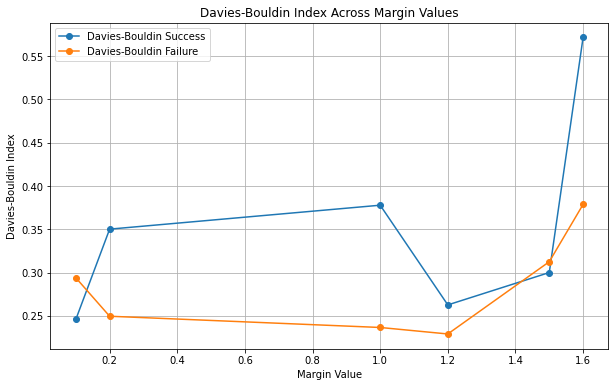

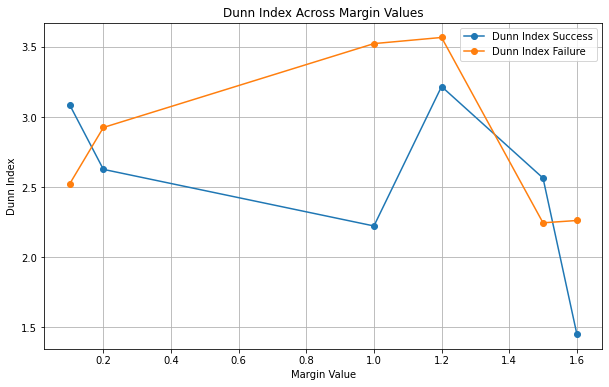

In [129]:
import matplotlib.pyplot as plt

def plot_all_metrics(all_metrics, margin_values):
    # Ensure margin values align with the number of metrics
    if len(all_metrics) != len(margin_values):
        raise ValueError("The number of margin values must match the number of checkpoints.")

    # Extract metrics
    silhouette_success = [entry[1]['silhouette_success'] for entry in all_metrics]
    silhouette_failure = [entry[1]['silhouette_failure'] for entry in all_metrics]
    dbi_success = [entry[1]['dbi_success'] for entry in all_metrics]
    dbi_failure = [entry[1]['dbi_failure'] for entry in all_metrics]
    dunn_index_success = [entry[1]['dunn_index_success'] for entry in all_metrics]
    dunn_index_failure = [entry[1]['dunn_index_failure'] for entry in all_metrics]

    # Plot Silhouette Scores
    plt.figure(figsize=(10, 6))
    plt.plot(margin_values, silhouette_success, label='Silhouette Success', marker='o')
    plt.plot(margin_values, silhouette_failure, label='Silhouette Failure', marker='o')
    plt.xlabel('Margin Value')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores Across Margin Values')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Davies-Bouldin Index
    plt.figure(figsize=(10, 6))
    plt.plot(margin_values, dbi_success, label='Davies-Bouldin Success', marker='o')
    plt.plot(margin_values, dbi_failure, label='Davies-Bouldin Failure', marker='o')
    plt.xlabel('Margin Value')
    plt.ylabel('Davies-Bouldin Index')
    plt.title('Davies-Bouldin Index Across Margin Values')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Dunn Index
    plt.figure(figsize=(10, 6))
    plt.plot(margin_values, dunn_index_success, label='Dunn Index Success', marker='o')
    plt.plot(margin_values, dunn_index_failure, label='Dunn Index Failure', marker='o')
    plt.xlabel('Margin Value')
    plt.ylabel('Dunn Index')
    plt.title('Dunn Index Across Margin Values')
    plt.legend()
    plt.grid()
    plt.show()

# Example usage after computing all_metrics
margin_values = [0.1, 0.2, 1.0, 1.2, 1.5,1.6]
plot_all_metrics(all_metrics, margin_values)


In [131]:
import numpy as np

def find_best_margin(all_metrics, margin_values):
    # Extract each metric across all checkpoints for normalization
    silhouette_success = np.array([entry[1]['silhouette_success'] for entry in all_metrics])
    silhouette_failure = np.array([entry[1]['silhouette_failure'] for entry in all_metrics])
    dbi_success = np.array([entry[1]['dbi_success'] for entry in all_metrics])
    dbi_failure = np.array([entry[1]['dbi_failure'] for entry in all_metrics])
    dunn_index_success = np.array([entry[1]['dunn_index_success'] for entry in all_metrics])
    dunn_index_failure = np.array([entry[1]['dunn_index_failure'] for entry in all_metrics])

    # Normalize metrics (higher silhouette and Dunn are better, lower DBI is better)
    norm_silhouette_success = (silhouette_success - np.min(silhouette_success)) / (np.max(silhouette_success) - np.min(silhouette_success))
    norm_silhouette_failure = (silhouette_failure - np.min(silhouette_failure)) / (np.max(silhouette_failure) - np.min(silhouette_failure))
    norm_dbi_success = 1 - (dbi_success - np.min(dbi_success)) / (np.max(dbi_success) - np.min(dbi_success))  # Invert as lower is better
    norm_dbi_failure = 1 - (dbi_failure - np.min(dbi_failure)) / (np.max(dbi_failure) - np.min(dbi_failure))
    norm_dunn_index_success = (dunn_index_success - np.min(dunn_index_success)) / (np.max(dunn_index_success) - np.min(dunn_index_success))
    norm_dunn_index_failure = (dunn_index_failure - np.min(dunn_index_failure)) / (np.max(dunn_index_failure) - np.min(dunn_index_failure))

    # Calculate the aggregate score for each margin value
    # You may adjust weights according to the importance of each metric
    aggregate_scores = (
        0.3 * norm_silhouette_success +
        0.3 * norm_silhouette_failure +
        0.2 * norm_dbi_success +
        0.2 * norm_dbi_failure +
        0.1 * norm_dunn_index_success +
        0.1 * norm_dunn_index_failure
    )

    # Identify the best margin based on the highest aggregate score
    best_idx = np.argmax(aggregate_scores)
    best_margin = margin_values[best_idx]
    
    print(f"Best margin based on aggregate clustering metrics: {best_margin}")
    return best_margin, aggregate_scores

# Example usage after computing all_metrics and defining margin values
margin_values = [0.1,0.2, 1.0, 1.2, 1.5,1.6]
best_margin, aggregate_scores = find_best_margin(all_metrics, margin_values)


Best margin based on aggregate clustering metrics: 1.2


In [132]:
all_metrics

[(0,
  {'silhouette_success': 0.8364768,
   'silhouette_failure': 0.84894633,
   'dbi_success': 0.2459231597340262,
   'dbi_failure': 0.29405079449286636,
   'dunn_index_success': 3.087907342641828,
   'dunn_index_failure': 2.5212228850947582}),
 (1,
  {'silhouette_success': 0.78567284,
   'silhouette_failure': 0.85577124,
   'dbi_success': 0.3501929361266384,
   'dbi_failure': 0.249636288606132,
   'dunn_index_success': 2.6262690583357142,
   'dunn_index_failure': 2.9250104779054116}),
 (2,
  {'silhouette_success': 0.76069796,
   'silhouette_failure': 0.8592213,
   'dbi_success': 0.37782742303531763,
   'dbi_failure': 0.23666091439199016,
   'dunn_index_success': 2.2225013284323034,
   'dunn_index_failure': 3.5232943999703923}),
 (3,
  {'silhouette_success': 0.8106194,
   'silhouette_failure': 0.8523395,
   'dbi_success': 0.26271244785435816,
   'dbi_failure': 0.2291548952408502,
   'dunn_index_success': 3.2171895551662186,
   'dunn_index_failure': 3.5671418801038834}),
 (4,
  {'silho

In [19]:
## STATE ENCODING

In [133]:
st_loader = StateLoader(nr_mps=2, mps=None)
(batch_pos1, batch_pos2, batch_neg1), key, all_aff_keys, all_obj_keys, action_keys, (fstate_p1, fstate_p2, fstate_n1), t = st_loader.get_subgraph_state_data(batch_size=1)
feats = batch_pos1[0][0]
nei_index = batch_pos1[0][1]
mps = st_loader.generate_mps_st(nei_index, all_aff_keys, all_obj_keys, action_keys, fstate_p1)
mps_dims = [mp.shape[1] for mp in mps]
feats_dim_list = [i.shape[1] for i in batch_pos1[0][0]]

TypeError: cannot unpack non-iterable NoneType object

In [ ]:
PATH_TO_CHECKPOINTS = os.path.join(str(os.getcwd()),"checkpoints")
PATH_TO_CHECKPOINTS
checkpoint_files = ["triplet_0.5_8_3.197206497192383.pkl","triplet_loss_0.2_8_0.22625350952148438.pkl","contrastive_0.5_9_1.4001202583312988.pkl"]
checkpoint_path = os.path.join(PATH_TO_CHECKPOINTS, checkpoint_files[0])


In [22]:
def get_data_for_episode(st_loader, batch, full_state):
    feats = batch[0][0]
    nei_index = batch[0][1]
    mps = st_loader.generate_mps_episode(nei_index, full_state)
    return feats, nei_index, mps


In [4]:
count_mps=2
args = heco_params()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = HeCo(args.hidden_dim, feats_dim_list, args.feat_drop, args.attn_drop,
                 count_mps, args.sample_rate, args.nei_num, args.tau, args.lam, mps_dims).to(device)
model.load_state_dict(torch.load(checkpoint_path))

model.eval()


HeCo(
  (fc_list): ModuleList(
    (0): Linear(in_features=512, out_features=64, bias=True)
    (1): Linear(in_features=512, out_features=64, bias=True)
    (2): Linear(in_features=513, out_features=64, bias=True)
    (3): Linear(in_features=16, out_features=64, bias=True)
  )
  (feat_drop): Dropout(p=0.3, inplace=False)
  (mp): Mp_encoder(
    (node_level): ModuleList(
      (0): ModifiedGCN(
        (fc_state): Linear(in_features=64, out_features=64, bias=False)
        (fc_action): Linear(in_features=1678, out_features=64, bias=False)
        (act): PReLU(num_parameters=1)
      )
      (1): ModifiedGCN(
        (fc_state): Linear(in_features=64, out_features=64, bias=False)
        (fc_action): Linear(in_features=833, out_features=64, bias=False)
        (act): PReLU(num_parameters=1)
      )
    )
    (att): Attention(
      (fc): Linear(in_features=64, out_features=64, bias=True)
      (tanh): Tanh()
      (softmax): Softmax(dim=None)
      (attn_drop): Dropout(p=0.5, inplace=Fal

In [5]:
def get_data_for_state(st_loader, batch, all_aff_keys, all_obj_keys, action_keys, full_state):
    feats = batch[0][0]
    nei_index = batch[0][1]
    mps = st_loader.generate_mps_st(nei_index, all_aff_keys, all_obj_keys, action_keys, full_state)
    return feats, nei_index, mps

In [6]:
alpha=0.5
loss_type=None
(batch_pos1, batch_pos2, batch_neg1), key, all_aff_keys, all_obj_keys, action_keys, (
        fstate_p1, fstate_p2, fstate_n1), (tp1, tp2, tn) = st_loader.get_subgraph_state_data(batch_size=1)
feats_p1, nei_index_p1, mps_p1 = get_data_for_state(st_loader, batch_pos1, all_aff_keys, all_obj_keys,
                                                            action_keys, fstate_p1)



In [7]:
z_sc, z_mp, intra, inter= model(feats_p1, nei_index_p1, mps_p1, alpha, loss_type, testing=True)

tensor([[[0.0612],
         [0.0478],
         [0.0439],
         [0.0498],
         [0.0459],
         [0.0619],
         [0.0455],
         [0.0457],
         [0.0451],
         [0.0288],
         [0.0583],
         [0.0463],
         [0.0376],
         [0.0359],
         [0.0456],
         [0.0447],
         [0.0429],
         [0.0427],
         [0.0362],
         [0.0458],
         [0.0376],
         [0.0505]]], device='cuda:0', grad_fn=<SoftmaxBackward>)
tensor([[[1.]]], device='cuda:0', grad_fn=<SoftmaxBackward>)
sc  [0.36825174 0.63174826]
mp  [0.9989666  0.00103341]


C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\sc_encoder.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)
C:\Users\WorkStation\Documents\rl_main_loop_create_env\hetgraph_gt_encoder\models\mp_encoder.py:95: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  beta = self.softmax(beta)


In [12]:
inter

array([0.36825174, 0.63174826], dtype=float32)